# Final Project Submission

Please fill out:
* Student name: **Timothy Sennett**
* Student pace: **part time**
* Scheduled project review date/time: 
* Instructor name: **Abhineet Kulkarni**
* Blog post URL: http://www.medium.com/timsennett


In this Module 1 Final Project, I'm going to obtain housing data from King County, Washington, and I'm going to be taking my first attempt at executing the entire data science process from start to finish. Ultimately, the goal is to measure the impact that each independent variable (e.g., geographic location, square footage) has on the value that I'm trying to predict—home value!

To that end, I'll have to first ensure that my data is clean, reliable, and model-friendly. This will involve proper handling of missing values, extraneous values, categorical data, duplicates, and outliers. Then, once my data has been thoroughly scrubbed, I can explore my data further, gaining a deeper understanding of how all of the data features interact with one another, and what their influence is on the target variable (`'price'`). With the help of various statistical methods and visualizations, I'll get an idea of which features have the most predictive value.

Finally, I'm going to build and test a linear regression model that will predict increases/decreases in a home's value according to any corresponding increases/decreases in the independent variables. I will then construct and deliver a mock business presentation to a hypothetical stakeholder of my choosing, providing three recommendations that will help them maximize their profit when selling their current home and buying a new one.

In my case, I've chosen to share my findings with a real estate agent who is representing a married couple who have become empty-nesters. Their three kids have grown up and are now scattered around the country. The parents want a smaller place, one that isn't as difficult to maintain as their current 4-bedroom house. Physical ailments make it difficult for them to climb stairs or do yard work, and they're looking to move to a place with a layout more suitable to them in this phase of their lives. They and their agent want to know: How is downsizing likely going to affect their bottom line, and what features should they prioritize in their search to ensure that they're getting everything they want in their new home while still getting a good value?

### Following the [OSEMN framework](https://towardsdatascience.com/5-steps-of-a-data-science-project-lifecycle-26c50372b492), the present notebook is organized according to the following basic steps:

1. Obtain
2. Scrub
3. Explore
4. Model
5. Interpret

## 1. Obtain
#### Gathering data from the relevant sources.

In [1]:
# Import libraries that I anticipate using.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In the next cell, I'll check to see what's in the current repository. I want to be sure to load the appropriate data.

In [2]:
ls

CONTRIBUTING.md             kc_house_data.csv
LICENSE.md                  module1_project_rubric.pdf
README.md                   student.ipynb
awesome.gif                 untitled.txt
column_names.md             zipcodemap.png


In [3]:
# Import data file as Pandas DataFrame and assign to the variable house_df.

house_df = pd.read_csv('kc_house_data.csv')

In [4]:
# Check to see that my data imported properly.

house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In the next few cells, I'll look to understand the dimentionality of my dataset, and get a feel for what sort of data it contains. I'll also be on the lookout for signs of any missing data.

In [5]:
house_df.shape

(21597, 21)

In [6]:
house_df.info()

# The DataFrame includes 21 total features and 21597 observations, or rows, of data.
# Three features have fewer than 21597 entries, i.e., missing data: waterfront, view, and yr_renovated.
# Two features have an object dtype: date and (curiously) sqft_basement.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [7]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Right away, I can tell that outliers are potentially skewing the mean of the following features: `'price'`, `'bedrooms'`, `'sqft_living'`, `'sqft_lot'`, `'sqft_above'`, `'sqft_living15'`, `'sqft_lot15'`, `'condition'`, `'grade'`.

For the `'waterfront'` feature, it appears that '1' represents True, while '0' represents False.

`'Zipcode'`, `'Latitude'`, `'Longitude'`, `'grade'`, `'view'` and `'condition'` ought to be dealt with as categorical data.

`'Sqft_basement'` doesn't appear in this summary, because it's of object type. Better change to float type.

For houses that haven't been renovated, their `'yr_renovated'` value is 0, which is misleading, and dramatically influences the measures of central tendency and dispersion for this feature.

## 2. Scrub
Clean data to format that machine understands.

The first thing I'll do is delete the entire `'id'` column. Each house has a unique ID number. But since these are just random values that have no meaning, it's best to remove them entirely.

In [8]:
house_df.drop('id', axis = 1, inplace = True)
house_df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

Next, I'll get a sum and percentages of the null values in each feature.

In [9]:
house_df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [10]:
house_df.isna().sum() / len(house_df.index)

date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.110015
view             0.002917
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.000000
yr_built         0.000000
yr_renovated     0.177895
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
dtype: float64

Three features contain NaN values. I'll address them one-by one.

First I'm going to deal with those annoying missing values in the `'view'` column.

The relative amount of null values in the `'view'` column is so small—0.003%—that it makes sense to drop the rows containing null values in that column.

In [11]:
house_df.dropna(subset=['view'], inplace = True)

In [12]:
house_df.info()

# Now the total number of observations (rows) has been reduced by 63, down to 21534.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       19164 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     17704 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.5+ MB


Now I'm going to address the missing values in the `'yr-renovated'` column.

To start, I'll get a quick look at the distribution of the data in this column by plotting a histogram. I want to know, generally, **what is the share of houses in King County that have undergone renovation?**

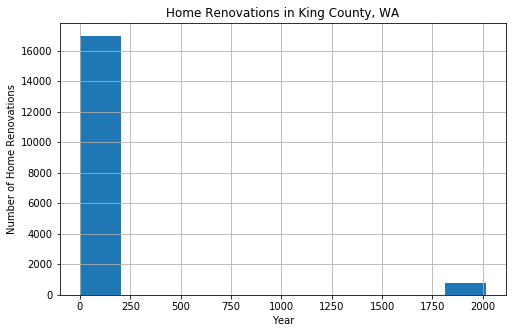

In [13]:
house_df['yr_renovated'].hist(figsize = (8,5))
plt.title('Home Renovations in King County, WA')
plt.xlabel('Year')
plt.ylabel('Number of Home Renovations')
plt.show()

In [14]:
house_df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [15]:
len(house_df[house_df['yr_renovated'] == 0])

16961

Clearly, when the number 0 appears (and it appears 16961 times, or about three-quarters of the time) it's there as a placeholder, indicating that the home has not been renovated.

Because 0 is far and away the most frequent value of this feature, I should be able to afford to assign those 3842 null values to 0. I'd much rather do that than delete 3842 rows of useful data (18% of my total data).

In [16]:
house_df['yr_renovated'].fillna(0, inplace = True)

In [17]:
house_df.yr_renovated.isna().sum()

0

Okay, that's taken care of! Although later I'm going to want to do something about all of those zeroes. For now, though, I'm going to address the missing values in the `'waterfront'` column.

To start, I'll get a quick look at the distribution of the data in this column by plotting a histogram. I'm looking to answer the question: **How common is it for houses in King County to have a waterfront?**

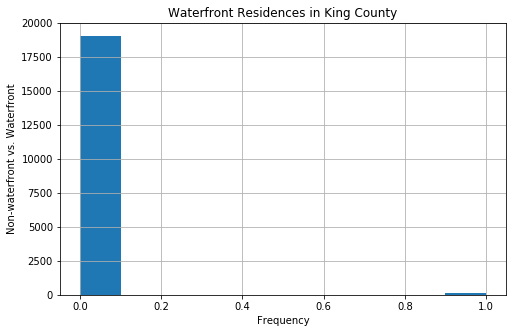

In [18]:
house_df['waterfront'].hist(figsize = (8,5))
plt.title('Waterfront Residences in King County')
plt.xlabel('Frequency')
plt.ylabel('Non-waterfront vs. Waterfront')
plt.show()

In [19]:
house_df['waterfront'].unique()

array([nan,  0.,  1.])

In [20]:
house_df.waterfront.isna().sum()

2370

In [21]:
len(house_df[house_df['waterfront'] == 0]) / len(house_df.index)

0.8832079502182595

Remember from above, 11% of observations contain a null value in the `'waterfront'` column. If I was to remove all of those rows, that would be more data than I'm comfortable deleting, if avoidable. And I'm certainly not going to delete the column itself, since most of it is filled with perfectly good data.

I could also keep these null values and treat them as their own category.

No, instead I'll replace the null values with 0, since **0 is by far the most common value of this feature** (88% of all observations), making it the logical replacement for my null values. This seems like a reasonable choice. The only downside of this, though, is that doing so will influence the distribution of this variable, if only marginally.

In [22]:
house_df['waterfront'].fillna(0, inplace = True)

In [23]:
house_df['waterfront'].unique()

array([0., 1.])

In [24]:
house_df['waterfront'] = house_df['waterfront'].astype(int)

In [25]:
house_df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Now, I'm free of all obvious null values!

The next thing I want to do is transform my categorical data through one-hot encoding. This involves converting each category into a new column, and assigning a 1 or 0 to the column. This way my regression model will be able to handle the data.

Revisiting the `'yr_renovated'` column, I don't like that '0' is used as a placeholder for houses that have not been renovated. This seems like a situation that could benefit from binning. Doing that means the data here will be treated as categorical variables. I'll section my data off into decades.

In [26]:
house_df['yr_renovated'].sort_values().unique()

array([   0., 1934., 1940., 1944., 1945., 1946., 1948., 1950., 1951.,
       1953., 1954., 1955., 1956., 1957., 1958., 1959., 1960., 1962.,
       1963., 1964., 1965., 1967., 1968., 1969., 1970., 1971., 1972.,
       1973., 1974., 1975., 1976., 1977., 1978., 1979., 1980., 1981.,
       1982., 1983., 1984., 1985., 1986., 1987., 1988., 1989., 1990.,
       1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999.,
       2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015.])

In [27]:
bins = [0, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019]
bins_yr_renovated = pd.cut(house_df['yr_renovated'], bins)
bins_yr_renovated = bins_yr_renovated.cat.as_ordered()

Now that my bins are created, I wonder if there are any trends in home renovations in King County over the decades. **Has home renovation decreased or increased?**

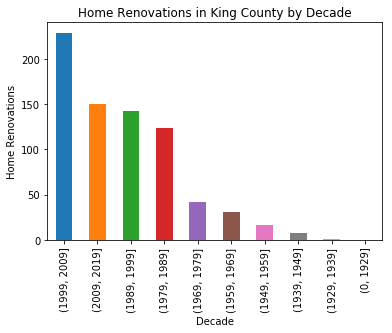

In [28]:
bins_yr_renovated.value_counts().plot(kind = 'bar')
plt.title('Home Renovations in King County by Decade')
plt.xlabel('Decade')
plt.ylabel('Home Renovations')
plt.show()

I like the looks of that distribution. Right away, I can see that **the number of home renovations in King County has increased every decade since the 1930s**. Now I'm going to get these binned columns onto my DataFrame (remembering to drop the first one so as to avoid the dummy variable trap).

In [29]:
house_df['yr_renovated'] = bins_yr_renovated
house_df['yr_renovated'] = house_df['yr_renovated'].cat.codes
yr_renovated_dummy = pd.get_dummies(bins_yr_renovated, prefix='yr_renovated', drop_first=True)
house_df = house_df.drop(['yr_renovated'], axis=1)
house_df = pd.concat([house_df, yr_renovated_dummy], axis=1)
house_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_lot15,"yr_renovated_(1929, 1939]","yr_renovated_(1939, 1949]","yr_renovated_(1949, 1959]","yr_renovated_(1959, 1969]","yr_renovated_(1969, 1979]","yr_renovated_(1979, 1989]","yr_renovated_(1989, 1999]","yr_renovated_(1999, 2009]","yr_renovated_(2009, 2019]"
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0.0,3,...,5650,0,0,0,0,0,0,0,0,0
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0.0,3,...,7639,0,0,0,0,0,0,1,0,0
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0.0,3,...,8062,0,0,0,0,0,0,0,0,0
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0.0,5,...,5000,0,0,0,0,0,0,0,0,0
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0.0,3,...,7503,0,0,0,0,0,0,0,0,0


Looks good.

The `'date'` column is meant to represent when each house was sold. I noticed that these dates are formatted as strings, but it makes more sense, and will potentially be much more practical, for this series to be of datetime dtype.

In [30]:
import datetime as dt
from datetime import datetime

In [31]:
house_df.date.dtype

dtype('O')

In [32]:
pd.to_datetime(house_df.date).head()

# Looks good. I'll commit the changes in the next cell.

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [33]:
house_df['date'] = pd.to_datetime(house_df.date)

In [34]:
# Check to see that there are no extraneous values, and that all dates fall within the expected range.

house_df['date'].describe()

count                   21534
unique                    371
top       2014-06-23 00:00:00
freq                      142
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

In [35]:
house_df['date'].value_counts().head()

2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    124
Name: date, dtype: int64

As expected, the dtype for `'date'` is now datetime64.

I'm going to simplify my next steps by creating a new column called `'seasons'`, and applying a numerical value to each date value, according to the range of months that a given date falls in, whereby 1 = winter months, 2 = spring months, 3 = summer months, and 4 = fall months.

In [36]:
house_df['season'] = house_df.date.apply(lambda dt: (dt.month%12 + 3)//3)

In [37]:
house_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,"yr_renovated_(1929, 1939]","yr_renovated_(1939, 1949]","yr_renovated_(1949, 1959]","yr_renovated_(1959, 1969]","yr_renovated_(1969, 1979]","yr_renovated_(1979, 1989]","yr_renovated_(1989, 1999]","yr_renovated_(1999, 2009]","yr_renovated_(2009, 2019]",season
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0.0,3,...,0,0,0,0,0,0,0,0,0,4
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0.0,3,...,0,0,0,0,0,0,1,0,0,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0.0,3,...,0,0,0,0,0,0,0,0,0,1
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0.0,5,...,0,0,0,0,0,0,0,0,0,1
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0.0,3,...,0,0,0,0,0,0,0,0,0,1


It makes sense to restructure my new `'season'` data into bins, so that they're treated as categorical variables. This will be a lot more friendly to my regression model later on.

I'll do it through one-hot encoding: converting each category into a new column, assigning a 1 or 0 to the column, and avoiding the dummy variable trap by dropping one of the dummy variables (by passing drop_first=True to get_dummies()).

In [38]:
bins = [0, 1, 2, 3, 4]
bins_season = pd.cut(house_df['season'], bins)
bins_season = bins_season.cat.as_ordered()

Now I should easily be able to answer this question: **Does time-of-year have an affect on home sales?**

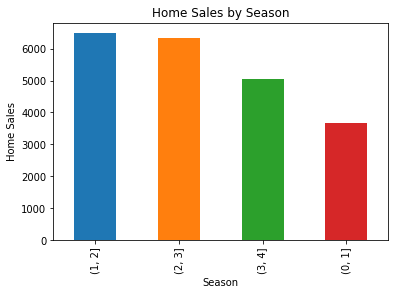

In [39]:
bins_season.value_counts().plot(kind = 'bar')
plt.title('Home Sales by Season')
plt.xlabel('Season')
plt.ylabel('Home Sales')
plt.show()

/Users/timsennett/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


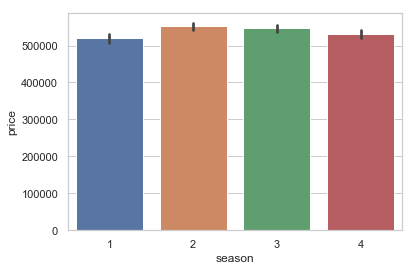

In [40]:
sns.set(style="whitegrid")
sns.barplot(x="season", y="price", data=house_df)

Clearly, home sales in King County increase in the spring (2) and summer (3) months, then they drop as fall (4) and winter (1) aproach.

In [41]:
house_df['season'] = bins_season
house_df['season'] = house_df['season'].cat.codes
season_dummy = pd.get_dummies(bins_season, prefix='season', drop_first=True)
house_df = house_df.drop(['season'], axis=1)
house_df = house_df.drop(['date'], axis=1)
house_df = pd.concat([house_df, season_dummy], axis=1)
house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,"yr_renovated_(1949, 1959]","yr_renovated_(1959, 1969]","yr_renovated_(1969, 1979]","yr_renovated_(1979, 1989]","yr_renovated_(1989, 1999]","yr_renovated_(1999, 2009]","yr_renovated_(2009, 2019]","season_(1, 2]","season_(2, 3]","season_(3, 4]"
0,221900.0,3,1.00,1180,5650,1.0,0,0.0,3,7,...,0,0,0,0,0,0,0,0,0,1
1,538000.0,3,2.25,2570,7242,2.0,0,0.0,3,7,...,0,0,0,0,1,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,0.0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0.0,5,7,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0.0,3,8,...,0,0,0,0,0,0,0,0,0,0


Great! Working from the data in the date column, I created a new categorical column called `'season'` and then binned that data so that my later regression model can handle it.

It would now make sense to do something about the `'zipcode'` feature. Since zip codes in themselves are a kind of categorical data, not continuous data, one approach would be create a new feature for each zip code.

That does seem like a headache, though. Another thing I could do instead is group these zip codes by their areas. And since I'm not too familiar with King County, WA, that'll require some research on my end.

Thankfully, a closer look at a zip code map of King County reveals to me that every zip code in King County starts with 980, 981, or 982, and the zip codes in this county are clustered geographically into three groups (urban, suburban, and rural, it appears), according to their first three digits. For example, all of the zip codes beginning with 981 are clustered in and around Seattle in the western part of the county. With this in mind, I'll do the same thing that I did above for my `'yr_renovated'` and `'season'` data, only this time with `'zipcode'`.

![](./zipcodemap.png)

In [42]:
house_df['zipcode'].dtype

dtype('int64')

In [43]:
house_df['zipcode'].sort_values().unique()

array([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010,
       98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029,
       98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042,
       98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070,
       98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106,
       98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119,
       98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155,
       98166, 98168, 98177, 98178, 98188, 98198, 98199])

As it turns out, the only zip codes in this data set are those that begin with 980 and 981. So I'll only need two bins.

In [44]:
bins = [98000, 98100, 98200]
bins_zipcode = pd.cut(house_df['zipcode'], bins)
bins_zipcode = bins_zipcode.cat.as_ordered()

**Which zip codes in King County see the most home sales?**

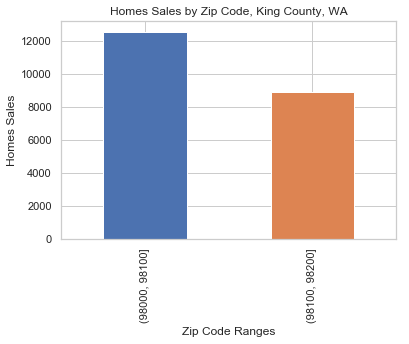

In [45]:
bins_zipcode.value_counts().plot(kind = 'bar')
plt.title('Homes Sales by Zip Code, King County, WA')
plt.xlabel('Zip Code Ranges')
plt.ylabel('Homes Sales')
plt.show()

By a fairly wide margin, **the most suburban part of the county (in zip codes beginning with 980) sees more home sales than the most urban part of the county (in zip codes beginning with 981).** One possible reason for this is that there may be more homeowners in the suburbs, whereas people in the city might be more likely to rent.

In [46]:
house_df['zipcode'] = bins_zipcode
house_df['zipcode'] = house_df['zipcode'].cat.codes
zipcode_dummy = pd.get_dummies(bins_zipcode, prefix='zipcode', drop_first=True)
house_df = house_df.drop(['zipcode'], axis=1)
house_df = pd.concat([house_df, zipcode_dummy], axis=1)
house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,"yr_renovated_(1959, 1969]","yr_renovated_(1969, 1979]","yr_renovated_(1979, 1989]","yr_renovated_(1989, 1999]","yr_renovated_(1999, 2009]","yr_renovated_(2009, 2019]","season_(1, 2]","season_(2, 3]","season_(3, 4]","zipcode_(98100, 98200]"
0,221900.0,3,1.00,1180,5650,1.0,0,0.0,3,7,...,0,0,0,0,0,0,0,0,1,1
1,538000.0,3,2.25,2570,7242,2.0,0,0.0,3,7,...,0,0,0,1,0,0,0,0,0,1
2,180000.0,2,1.00,770,10000,1.0,0,0.0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0.0,5,7,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,0,0.0,3,8,...,0,0,0,0,0,0,0,0,0,0


Looking good.

Now there are still a few more categorical features to take care of.

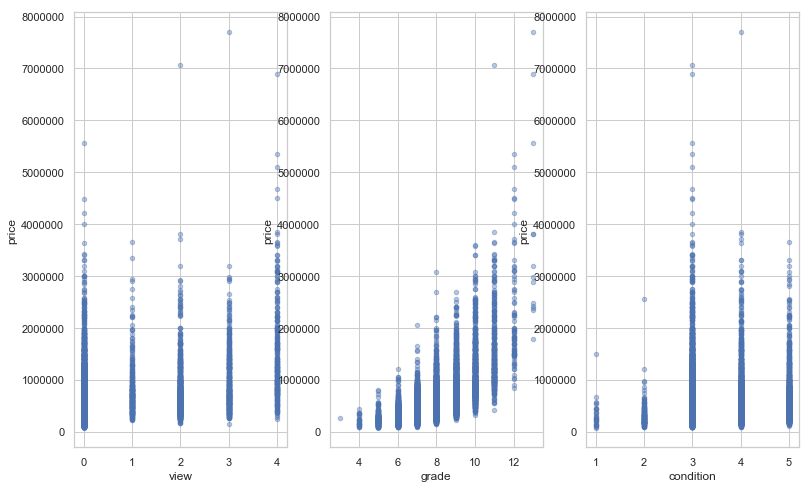

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13,8))

for xcol, ax in zip(['view', 'grade', 'condition'], axes):
    house_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
    plt.show

The vertical shape of the data points on these scatterplots indicates to me that these features should be treated as containing categorical data, and, as such, ought to undergo coarse classification, or binning.

In [48]:
print(house_df.view.sort_values().unique())
print(house_df.grade.sort_values().unique())
print(house_df.condition.sort_values().unique())

[0. 1. 2. 3. 4.]
[ 3  4  5  6  7  8  9 10 11 12 13]
[1 2 3 4 5]


In [49]:
bins1 = [-1, 0, 1, 2, 3, 4]
bins2 = [0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
bins3 = [0, 1, 2, 3, 4, 5]

bins_view = pd.cut(house_df['view'], bins1)
bins_grade = pd.cut(house_df['grade'], bins2)
bins_condition = pd.cut(house_df['condition'], bins3)

bins_view = bins_view.cat.as_ordered()
bins_grade = bins_grade.cat.as_ordered()
bins_condition = bins_condition.cat.as_ordered()

house_df['view'] = bins_view
house_df['grade'] = bins_grade
house_df['condition'] = bins_condition

house_df['view'] = house_df['view'].cat.codes
house_df['grade'] = house_df['grade'].cat.codes
house_df['condition'] = house_df['condition'].cat.codes

view_dummy = pd.get_dummies(bins_view, prefix='view', drop_first=True)
grade_dummy = pd.get_dummies(bins_grade, prefix='grade', drop_first=True)
condition_dummy = pd.get_dummies(bins_condition, prefix='condition', drop_first=True)

house_df = house_df.drop(['view', 'grade', 'condition'], axis=1)
house_df = pd.concat([house_df, view_dummy, grade_dummy, condition_dummy], axis=1)
house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,"grade_(7, 8]","grade_(8, 9]","grade_(9, 10]","grade_(10, 11]","grade_(11, 12]","grade_(12, 13]","condition_(1, 2]","condition_(2, 3]","condition_(3, 4]","condition_(4, 5]"
0,221900.0,3,1.00,1180,5650,1.0,0,1180,0.0,1955,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,2170,400.0,1951,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,1.00,770,10000,1.0,0,770,0.0,1933,...,0,0,0,0,0,0,0,1,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,1050,910.0,1965,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,0,1680,0.0,1987,...,1,0,0,0,0,0,0,1,0,0


Now that's taken care of.

But there's still some one-hot encoding to be done. Next, with my `'latitude'` and `'longitude'` data. Since these values don't have linear value, it's best that I bin these as well.

First, let me visualize this data with a scatterplot that shows me the approximate home price at each GPS coordinate. I want to know: **Does location have an affect on home value?**

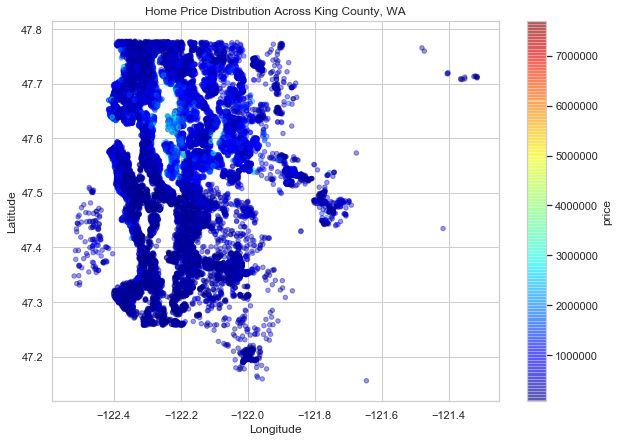

In [50]:
house_df.plot(kind="scatter", x="long", y="lat", alpha=0.4, figsize=(10,7),
              c="price", cmap=plt.get_cmap("jet"), colorbar=True,
              sharex=False)
plt.title('Home Price Distribution Across King County, WA')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

It even looks like King County!

According to this visual, **the most expensive homes in King County are, in general, near the eastern shore of Lake Washington, in the City of Bellevue.**

In order to make this information more model-friendly, I'm going to make five evenly distributed bins for `'latitude'` and `'longitude'`.

In [51]:
house_df['lat'].describe()

count    21534.000000
mean        47.560180
std          0.138528
min         47.155900
25%         47.471200
50%         47.571900
75%         47.678100
max         47.777600
Name: lat, dtype: float64

In [52]:
np.quantile(house_df['lat'], .2)

47.4324

In [53]:
house_df['long'].describe()

count    21534.000000
mean      -122.213948
std          0.140735
min       -122.519000
25%       -122.328000
50%       -122.230000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64

In [54]:
np.quantile(house_df['long'], .2)

-122.346

In [55]:
bins1 = [47.1558, 47.4325, 47.54, 47.6215, 47.691, 47.7776]
bins2 = [-122.518, -122.346, -122.286, -122.189, -122.094, -121.315]

bins_lat = pd.cut(house_df['lat'], bins1)
bins_long = pd.cut(house_df['long'], bins2)

bins_lat = bins_lat.cat.as_ordered()
bins_long = bins_long.cat.as_ordered()

house_df['lat'] = bins_lat
house_df['long'] = bins_long

house_df['lat'] = house_df['lat'].cat.codes
house_df['long'] = house_df['long'].cat.codes

lat_dummy = pd.get_dummies(bins_lat, prefix='lat', drop_first=True)
long_dummy = pd.get_dummies(bins_long, prefix='long', drop_first=True)

house_df = house_df.drop(['lat', 'long'], axis=1)
house_df = pd.concat([house_df, lat_dummy, long_dummy], axis=1)
house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,"condition_(3, 4]","condition_(4, 5]","lat_(47.432, 47.54]","lat_(47.54, 47.622]","lat_(47.622, 47.691]","lat_(47.691, 47.778]","long_(-122.346, -122.286]","long_(-122.286, -122.189]","long_(-122.189, -122.094]","long_(-122.094, -121.315]"
0,221900.0,3,1.00,1180,5650,1.0,0,1180,0.0,1955,...,0,0,1,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,2170,400.0,1951,...,0,0,0,0,0,1,1,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,770,0.0,1933,...,0,0,0,0,0,1,0,1,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,1050,910.0,1965,...,0,1,1,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,1680,0.0,1987,...,0,0,0,1,0,0,0,0,0,1


In [56]:
house_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built',
       'sqft_living15', 'sqft_lot15', 'yr_renovated_(1929, 1939]',
       'yr_renovated_(1939, 1949]', 'yr_renovated_(1949, 1959]',
       'yr_renovated_(1959, 1969]', 'yr_renovated_(1969, 1979]',
       'yr_renovated_(1979, 1989]', 'yr_renovated_(1989, 1999]',
       'yr_renovated_(1999, 2009]', 'yr_renovated_(2009, 2019]',
       'season_(1, 2]', 'season_(2, 3]', 'season_(3, 4]',
       'zipcode_(98100, 98200]', 'view_(0, 1]', 'view_(1, 2]', 'view_(2, 3]',
       'view_(3, 4]', 'grade_(3, 4]', 'grade_(4, 5]', 'grade_(5, 6]',
       'grade_(6, 7]', 'grade_(7, 8]', 'grade_(8, 9]', 'grade_(9, 10]',
       'grade_(10, 11]', 'grade_(11, 12]', 'grade_(12, 13]',
       'condition_(1, 2]', 'condition_(2, 3]', 'condition_(3, 4]',
       'condition_(4, 5]', 'lat_(47.432, 47.54]', 'lat_(47.54, 47.622]',
       'lat_(47.622, 47.691]', 'lat_(47.691, 47.778]

Okay, that's (almost) a wrap on coarse classification!

Another thing that stood out to me earlier is that the `'sqft_basement'` column is for some reason set as object type rather than int64 or float64.

In [57]:
house_df.sqft_basement.dtype

dtype('O')

In [58]:
house_df['sqft_basement'][0:10]

# Notice that some values are a ? instead of a number or NaN.
# These question marks represent missing data, and are forcing the whole series to be of object dtype.

0        0.0
1      400.0
2        0.0
3      910.0
4        0.0
5     1530.0
6          ?
8      730.0
9        0.0
10    1700.0
Name: sqft_basement, dtype: object

In [59]:
house_df["sqft_basement"].value_counts().head()

# This occurs 454 times.

0.0      12798
?          452
600.0      216
500.0      209
700.0      207
Name: sqft_basement, dtype: int64

In [60]:
house_df.sqft_basement.value_counts(normalize=True).head()

# That means it occurs in 2.1% of all observations.

0.0      0.594316
?        0.020990
600.0    0.010031
500.0    0.009706
700.0    0.009613
Name: sqft_basement, dtype: float64

Given the relative rareness of this occurance, I'm simply going to drop all rows containing '?' in `'sqft_basement'`.

In [61]:
house_df.drop(house_df[house_df.sqft_basement == '?'].index, inplace = True)

In [62]:
house_df["sqft_basement"].value_counts().head()

0.0      12798
600.0      216
500.0      209
700.0      207
800.0      201
Name: sqft_basement, dtype: int64

Now that those question marks are out of the way, I'll transform this series to float dtype.

In [63]:
house_df['sqft_basement'].astype(float).head()

0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement, dtype: float64

In [64]:
# Looks good. Time to commit the transformation.

house_df['sqft_basement'] = house_df['sqft_basement'].astype(float)

In [65]:
house_df.sqft_basement.dtype

dtype('float64')

At this point, I'm going to check to see if there are any problemetic outliers in the data. I'll begin by re-checking my data summary.

In [66]:
house_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,"condition_(3, 4]","condition_(4, 5]","lat_(47.432, 47.54]","lat_(47.54, 47.622]","lat_(47.622, 47.691]","lat_(47.691, 47.778]","long_(-122.346, -122.286]","long_(-122.286, -122.189]","long_(-122.189, -122.094]","long_(-122.094, -121.315]"
count,2.108200e+04,21082.000000,21082.000000,21082.000000,2.108200e+04,21082.00000,21082.000000,21082.000000,21082.000000,21082.000000,...,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,5.402469e+05,3.372403,2.115916,2080.359975,1.507759e+04,1.49362,0.006688,1789.000000,291.359975,1971.023337,...,0.262689,0.078835,0.200408,0.199554,0.200266,0.199696,0.202637,0.198937,0.199080,0.199032
std,3.667323e+05,0.924996,0.768142,917.856396,4.117338e+04,0.53937,0.081509,828.369355,442.007858,29.323120,...,0.440105,0.269487,0.400315,0.399675,0.400209,0.399782,0.401974,0.399210,0.399318,0.399282
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.00000,0.000000,370.000000,0.000000,1900.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.00000,0.000000,1200.000000,0.000000,1952.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.50000,0.000000,1560.000000,0.000000,1975.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069775e+04,2.00000,0.000000,2210.000000,560.000000,1997.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.50000,1.000000,9410.000000,4820.000000,2015.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Yikes! I have a house in my dataset with 33 bedrooms!

I have a strong feeling this is a typo. Let me take a closer look at this house.

In [67]:
house_df[house_df["bedrooms"] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,"condition_(3, 4]","condition_(4, 5]","lat_(47.432, 47.54]","lat_(47.54, 47.622]","lat_(47.622, 47.691]","lat_(47.691, 47.778]","long_(-122.346, -122.286]","long_(-122.286, -122.189]","long_(-122.189, -122.094]","long_(-122.094, -121.315]"
15856,640000.0,33,1.75,1620,6000,1.0,0,1040,580.0,1947,...,0,1,0,0,1,0,1,0,0,0


33 bedrooms in 1,040 square feet? And only 1.75 bathrooms? Yeah, that strikes me as being a probable typo.

I'll replace that 33 with the median value for `'bedrooms'`, and that'll take care of this problem.

In [68]:
house_df.at[15856,'bedrooms'] = house_df['bedrooms'].median()

In [69]:
house_df.bedrooms.max()

11

In [70]:
house_df.bedrooms.std()

0.9022097995172176

Okay, now my `'bedroom'` data is back down to earth a little bit. And I was able to reduce the standard deviation just by replacing that one outrageous (and probably accidental) outlier.

Now, with the use of box plots, I'll see if there are any other outliers in my data. I'll be on the lookout for any data points that lay beyond the "whiskers" (i.e., horizontal lines), which represent Q1 - 1.5 * IQR and Q3 + 1.5 * IQR, respectively. I'm going to focusing on the plots that are produced for my numerical (i.e., continuous) data, rather than categorical (e..g, `'grade'`, `'waterfront'`), since that is where my outliers have the most significance.

In [71]:
cont_data = house_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                      'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15',
                      'sqft_lot15']].copy()

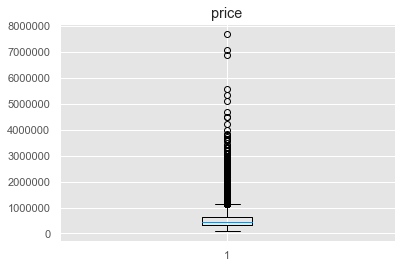

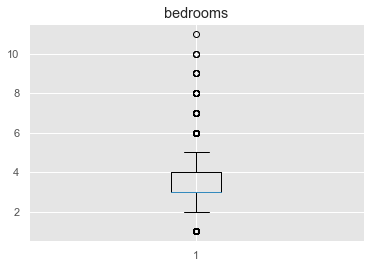

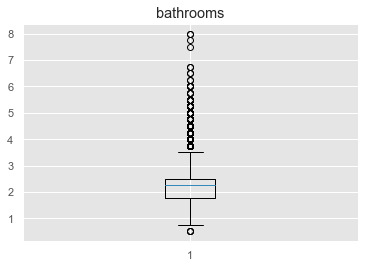

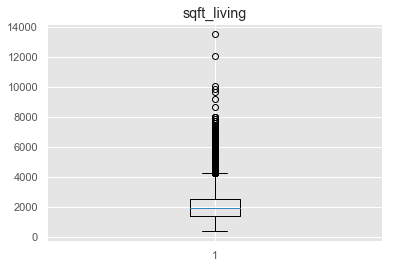

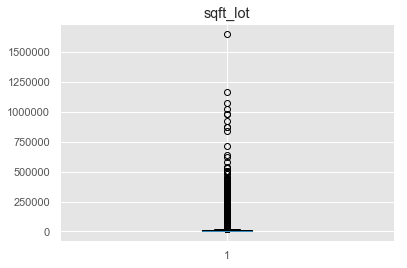

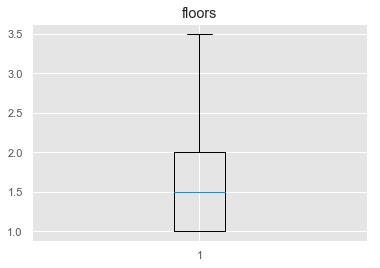

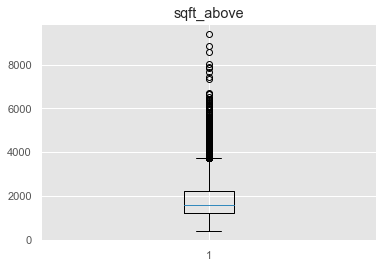

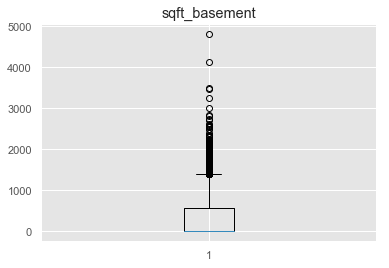

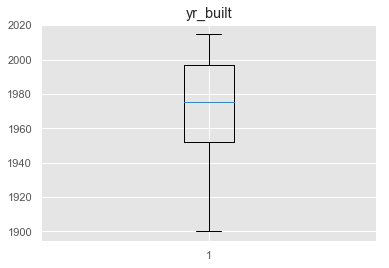

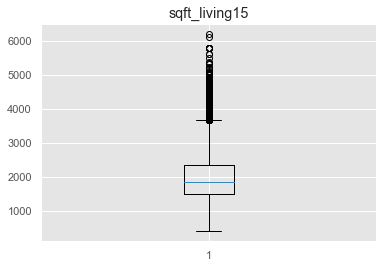

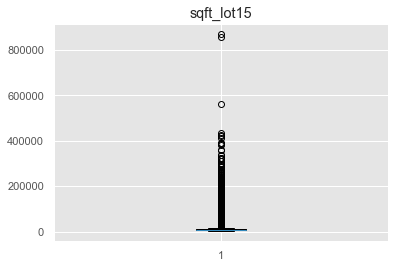

In [72]:
def boxplot(data):
    """Iterate through DataFrame and return boxplot of each feature."""
    for col in data:
        plt.style.use('ggplot')
        plt.boxplot(data[col])
        plt.title(col)
        plt.show()

boxplot(cont_data)

There are some wild outliers in this data, especially in all of the "square footage" features. I'll detect exactly where those outliers are by calculating a z-score for each feature, and eliminating rows that contain values with z-scores higher than a threshold of 3 (that is, any values than are more than three standard deviations away from the mean).

In [73]:
from scipy import stats

z = np.abs(stats.zscore(cont_data))
cont_data_o = cont_data[(z < 3).all(axis=1)]

In [74]:
# The shape of my data before removing outliers.

cont_data.shape

(21082, 11)

In [75]:
# The shape of my data after removing outliers.

cont_data_o.shape

(19762, 11)

The length of my dateframe was reduced by about 1,300 rows, just by removing all rows containing values with a z-score higher than 3. Now let's examine the side-by-side summaries of the data with and without those outliers, followed by updated box plots.

In [76]:
cont_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
count,2.108200e+04,21082.00000,21082.000000,21082.000000,2.108200e+04,21082.00000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,5.402469e+05,3.37098,2.115916,2080.359975,1.507759e+04,1.49362,1789.000000,291.359975,1971.023337,1986.917418,12732.514135
std,3.667323e+05,0.90221,0.768142,917.856396,4.117338e+04,0.53937,828.369355,442.007858,29.323120,685.544250,27148.781580
min,7.800000e+04,1.00000,0.500000,370.000000,5.200000e+02,1.00000,370.000000,0.000000,1900.000000,399.000000,651.000000
25%,3.220000e+05,3.00000,1.750000,1430.000000,5.040000e+03,1.00000,1200.000000,0.000000,1952.000000,1490.000000,5100.000000
50%,4.500000e+05,3.00000,2.250000,1910.000000,7.620000e+03,1.50000,1560.000000,0.000000,1975.000000,1840.000000,7626.000000
75%,6.450000e+05,4.00000,2.500000,2550.000000,1.069775e+04,2.00000,2210.000000,560.000000,1997.000000,2360.000000,10088.750000
max,7.700000e+06,11.00000,8.000000,13540.000000,1.651359e+06,3.50000,9410.000000,4820.000000,2015.000000,6210.000000,871200.000000


In [77]:
cont_data_o.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
count,1.976200e+04,19762.000000,19762.000000,19762.000000,19762.000000,19762.000000,19762.000000,19762.000000,19762.000000,19762.000000,19762.000000
mean,4.933207e+05,3.322235,2.048603,1966.808268,10098.228621,1.480037,1700.322235,266.486034,1970.391003,1919.951827,9278.740968
std,2.452112e+05,0.854000,0.694559,748.086555,11854.906505,0.537820,706.638292,396.643125,29.372328,605.274636,9195.997371
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,370.000000,0.000000,1900.000000,460.000000,651.000000
25%,3.150000e+05,3.000000,1.500000,1400.000000,5000.000000,1.000000,1170.000000,0.000000,1951.000000,1470.000000,5000.000000
50%,4.393040e+05,3.000000,2.000000,1860.000000,7422.000000,1.000000,1520.000000,0.000000,1973.000000,1800.000000,7500.000000
75%,6.120938e+05,4.000000,2.500000,2440.000000,10035.000000,2.000000,2100.000000,520.000000,1996.000000,2280.000000,9690.000000
max,1.640000e+06,6.000000,4.250000,4750.000000,137214.000000,3.000000,4270.000000,1610.000000,2015.000000,4042.000000,93825.000000


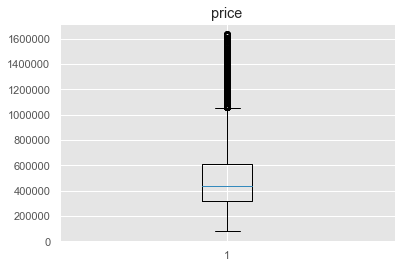

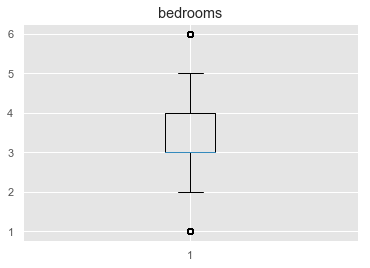

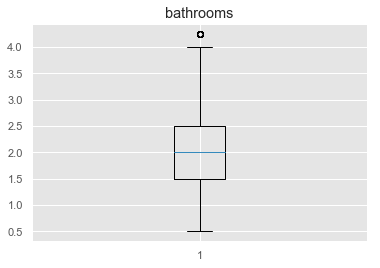

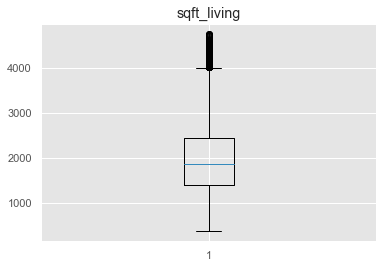

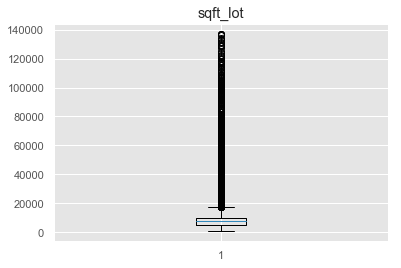

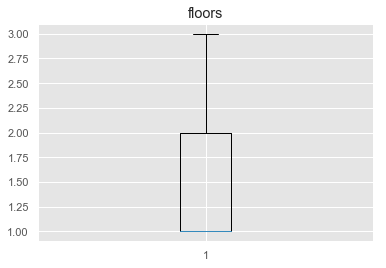

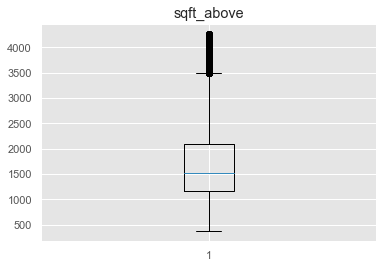

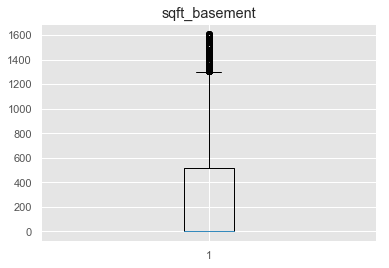

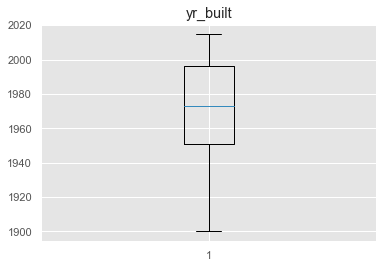

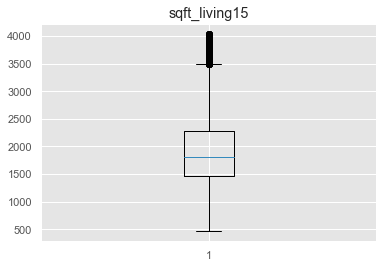

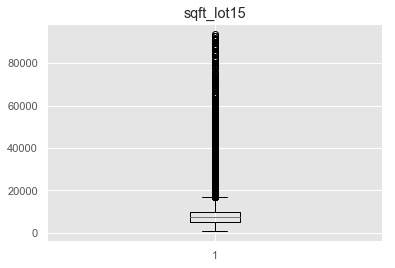

In [78]:
boxplot(cont_data_o)

That's more like it! Outliers still exist, but there are now fewer of them; the most extreme ones have been eliminated. Now I'll update my DataFrame to reflect these changes, by dropping the numerical columns from my original DataFrame, and performing an inner join with the new outlier-free DataFrame.

In [79]:
house_df.drop(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
               'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15',
               'sqft_lot15'], axis=1, inplace=True)

house_df = cont_data_o.join(house_df, how='inner')

In [80]:
house_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,...,"condition_(3, 4]","condition_(4, 5]","lat_(47.432, 47.54]","lat_(47.54, 47.622]","lat_(47.622, 47.691]","lat_(47.691, 47.778]","long_(-122.346, -122.286]","long_(-122.286, -122.189]","long_(-122.189, -122.094]","long_(-122.094, -121.315]"
count,1.976200e+04,19762.000000,19762.000000,19762.000000,19762.000000,19762.000000,19762.000000,19762.000000,19762.000000,19762.000000,...,19762.000000,19762.000000,19762.000000,19762.000000,19762.000000,19762.000000,19762.000000,19762.000000,19762.000000,19762.000000
mean,4.933207e+05,3.322235,2.048603,1966.808268,10098.228621,1.480037,1700.322235,266.486034,1970.391003,1919.951827,...,0.265408,0.078484,0.203724,0.194312,0.196387,0.204180,0.211112,0.195173,0.200891,0.185963
std,2.452112e+05,0.854000,0.694559,748.086555,11854.906505,0.537820,706.638292,396.643125,29.372328,605.274636,...,0.441562,0.268938,0.402777,0.395680,0.397275,0.403111,0.408108,0.396344,0.400677,0.389087
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,370.000000,0.000000,1900.000000,460.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.150000e+05,3.000000,1.500000,1400.000000,5000.000000,1.000000,1170.000000,0.000000,1951.000000,1470.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.393040e+05,3.000000,2.000000,1860.000000,7422.000000,1.000000,1520.000000,0.000000,1973.000000,1800.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.120938e+05,4.000000,2.500000,2440.000000,10035.000000,2.000000,2100.000000,520.000000,1996.000000,2280.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.640000e+06,6.000000,4.250000,4750.000000,137214.000000,3.000000,4270.000000,1610.000000,2015.000000,4042.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


I don't love all those 0 values in `'sqft_basement'`. Let me look at it as a histogram to see **how many times '0' appears in comparison to the other values in this feature.**

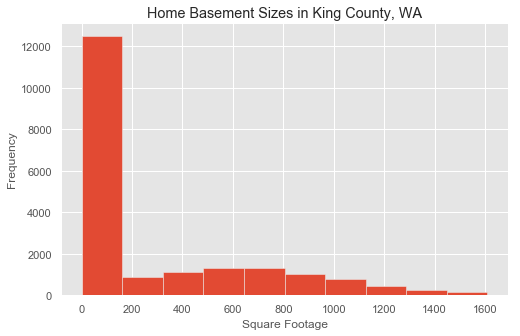

In [81]:
house_df.hist(column= ['sqft_basement'], figsize  = [8, 5]);
plt.title("Home Basement Sizes in King County, WA")
plt.xlabel("Square Footage")
plt.ylabel("Frequency")
plt.show()

Yikes. It turns out there are so many zeroes in this feature that it probably makes sense to coarse classify this as well, or else those zeroes will dramatically skew the distribution, and could give my model trouble later on. What I'll do is place these values into five evenly distributed bins, including a bin for all homes with no basement.

In [82]:
house_df.sqft_basement.describe()

count    19762.000000
mean       266.486034
std        396.643125
min          0.000000
25%          0.000000
50%          0.000000
75%        520.000000
max       1610.000000
Name: sqft_basement, dtype: float64

In [83]:
house_df['sqft_basement'].sort_values().unique()

array([   0.,   10.,   20.,   40.,   50.,   60.,   65.,   70.,   80.,
         90.,  100.,  110.,  120.,  130.,  140.,  143.,  145.,  150.,
        160.,  170.,  172.,  176.,  180.,  190.,  200.,  207.,  210.,
        220.,  225.,  230.,  235.,  240.,  243.,  248.,  250.,  260.,
        265.,  266.,  270.,  274.,  276.,  280.,  283.,  290.,  295.,
        300.,  310.,  320.,  330.,  340.,  350.,  360.,  370.,  374.,
        380.,  390.,  400.,  410.,  414.,  415.,  417.,  420.,  430.,
        435.,  440.,  450.,  460.,  470.,  480.,  490.,  500.,  506.,
        508.,  510.,  515.,  516.,  518.,  520.,  530.,  540.,  550.,
        556.,  560.,  570.,  580.,  588.,  590.,  600.,  602.,  610.,
        620.,  630.,  640.,  650.,  652.,  660.,  666.,  670.,  680.,
        690.,  700.,  704.,  710.,  720.,  730.,  740.,  750.,  760.,
        768.,  770.,  780.,  784.,  790.,  792.,  800.,  810.,  820.,
        830.,  840.,  850.,  860.,  861.,  862.,  870.,  875.,  880.,
        890.,  900.,

In [84]:
np.quantile(house_df['sqft_basement'], .9)

910.0

In [85]:
bins = [-1, 0, 400, 650, 910, 1610]
bins_base = pd.cut(house_df['sqft_basement'], bins)
bins_base = bins_base.cat.as_ordered()
house_df['sqft_basement'] = bins_base
house_df['sqft_basement'] = house_df['sqft_basement'].cat.codes
base_dummy = pd.get_dummies(bins_base, prefix='basement', drop_first=True)

house_df = house_df.drop(['sqft_basement'], axis=1)
house_df = pd.concat([house_df, base_dummy], axis=1)
house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,sqft_living15,sqft_lot15,...,"lat_(47.622, 47.691]","lat_(47.691, 47.778]","long_(-122.346, -122.286]","long_(-122.286, -122.189]","long_(-122.189, -122.094]","long_(-122.094, -121.315]","basement_(0, 400]","basement_(400, 650]","basement_(650, 910]","basement_(910, 1610]"
0,221900.0,3,1.00,1180,5650,1.0,1180,1955,1340,5650,...,0,0,0,1,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,2170,1951,1690,7639,...,0,1,1,0,0,0,1,0,0,0
2,180000.0,2,1.00,770,10000,1.0,770,1933,2720,8062,...,0,1,0,1,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,1050,1965,1360,5000,...,0,0,0,0,0,0,0,0,1,0
4,510000.0,3,2.00,1680,8080,1.0,1680,1987,1800,7503,...,0,0,0,0,0,1,0,0,0,0


Now that missing values, categorical data, and outliers are taken care of, I just have a few more things to check for.

First things first: Duplicate data.

In [86]:
duplicates = house_df[house_df.duplicated()]
print(len(duplicates))
duplicates.head()

2


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,sqft_living15,sqft_lot15,...,"lat_(47.622, 47.691]","lat_(47.691, 47.778]","long_(-122.346, -122.286]","long_(-122.286, -122.189]","long_(-122.189, -122.094]","long_(-122.094, -121.315]","basement_(0, 400]","basement_(400, 650]","basement_(650, 910]","basement_(910, 1610]"
4348,259950.0,2,2.00,1070,649,2.0,720,2008,1070,928,...,0,0,0,0,0,0,1,0,0,0
20508,529500.0,3,2.25,1410,905,3.0,1410,2014,1510,1352,...,0,0,0,0,0,0,0,0,0,0


The prices of those two homes do share all the same digits, but they aren't duplicates.

Now, I'll quickly check for any extraneous values.

In [87]:
for col in house_df.columns:
    print(col, '\n', house_df[col].value_counts(normalize=True).head(), '\n\n')

price 
 450000.0    0.008147
350000.0    0.008096
550000.0    0.007489
500000.0    0.007236
425000.0    0.007135
Name: price, dtype: float64 


bedrooms 
 3    0.469133
4    0.313582
2    0.132729
5    0.065479
6    0.009716
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.254326
1.00    0.187026
1.75    0.146847
2.25    0.097359
2.00    0.092602
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006730
1400    0.006629
1440    0.006477
1660    0.006426
1800    0.006325
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.017357
6000    0.014067
4000    0.012246
7200    0.010626
4800    0.005667
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.506983
2.0    0.368940
1.5    0.089414
3.0    0.028793
2.5    0.005870
Name: floors, dtype: float64 


sqft_above 
 1300    0.010272
1010    0.010222
1200    0.009969
1220    0.009513
1140    0.009007
Name: sqft_above, dtype: float64 


yr_built 
 2014    0.025655
2005    0.020291
2006    0.019785
2003    0.019583
1977    0

None found! The '?' found earlier in the `'sqft_basement'` column was already dealt with, or else than surely would've shown up here.

## 3. Explore
Understand the data. Find significant patterns and trends using statistical methods.

I've done quite a lot of exploring already, during the data scrubbing phase. But it can't hurt to re-check my summary statistics now that that's finished.

In [88]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19762 entries, 0 to 21596
Data columns (total 54 columns):
price                        19762 non-null float64
bedrooms                     19762 non-null int64
bathrooms                    19762 non-null float64
sqft_living                  19762 non-null int64
sqft_lot                     19762 non-null int64
floors                       19762 non-null float64
sqft_above                   19762 non-null int64
yr_built                     19762 non-null int64
sqft_living15                19762 non-null int64
sqft_lot15                   19762 non-null int64
waterfront                   19762 non-null int64
yr_renovated_(1929, 1939]    19762 non-null uint8
yr_renovated_(1939, 1949]    19762 non-null uint8
yr_renovated_(1949, 1959]    19762 non-null uint8
yr_renovated_(1959, 1969]    19762 non-null uint8
yr_renovated_(1969, 1979]    19762 non-null uint8
yr_renovated_(1979, 1989]    19762 non-null uint8
yr_renovated_(1989, 1999]    19762 

In [89]:
house_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,sqft_living15,sqft_lot15,...,"lat_(47.622, 47.691]","lat_(47.691, 47.778]","long_(-122.346, -122.286]","long_(-122.286, -122.189]","long_(-122.189, -122.094]","long_(-122.094, -121.315]","basement_(0, 400]","basement_(400, 650]","basement_(650, 910]","basement_(910, 1610]"
count,1.976200e+04,19762.000000,19762.000000,19762.000000,19762.000000,19762.000000,19762.000000,19762.000000,19762.000000,19762.000000,...,19762.000000,19762.000000,19762.000000,19762.000000,19762.000000,19762.000000,19762.000000,19762.000000,19762.000000,19762.000000
mean,4.933207e+05,3.322235,2.048603,1966.808268,10098.228621,1.480037,1700.322235,1970.391003,1919.951827,9278.740968,...,0.196387,0.204180,0.211112,0.195173,0.200891,0.185963,0.090527,0.096701,0.101154,0.097561
std,2.452112e+05,0.854000,0.694559,748.086555,11854.906505,0.537820,706.638292,29.372328,605.274636,9195.997371,...,0.397275,0.403111,0.408108,0.396344,0.400677,0.389087,0.286943,0.295557,0.301540,0.296728
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,370.000000,1900.000000,460.000000,651.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.150000e+05,3.000000,1.500000,1400.000000,5000.000000,1.000000,1170.000000,1951.000000,1470.000000,5000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.393040e+05,3.000000,2.000000,1860.000000,7422.000000,1.000000,1520.000000,1973.000000,1800.000000,7500.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.120938e+05,4.000000,2.500000,2440.000000,10035.000000,2.000000,2100.000000,1996.000000,2280.000000,9690.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.640000e+06,6.000000,4.250000,4750.000000,137214.000000,3.000000,4270.000000,2015.000000,4042.000000,93825.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Everything looks good so far! It's encouraging to see that the influence of outliers has been much reduced, as evidenced by the closer convergence of my mean and median values.

The variable we are going to predict is the `'price'`. So let me get a look at how much the other variables correlate with this dependent variable.

In [90]:
corr_matrix = house_df.corr()
corr_matrix["price"].sort_values(ascending=False)

# In descending order, this list tells me how well each variable correlates to 'price'
# on a scale of 1 to -1, with 1 meaning the most positive correlation, -1 meaning
# the most negative correlation, and 0 meaning there is no correlation.

price                        1.000000
sqft_living                  0.627242
sqft_living15                0.556379
sqft_above                   0.521664
bathrooms                    0.453171
lat_(47.622, 47.691]         0.383907
grade_(8, 9]                 0.360906
grade_(9, 10]                0.355440
bedrooms                     0.296032
floors                       0.269658
lat_(47.54, 47.622]          0.242550
basement_(910, 1610]         0.215622
grade_(10, 11]               0.199352
view_(2, 3]                  0.166177
view_(3, 4]                  0.164141
view_(1, 2]                  0.150376
grade_(7, 8]                 0.112797
view_(0, 1]                  0.098157
basement_(650, 910]          0.095392
waterfront                   0.094517
sqft_lot                     0.089921
yr_renovated_(1999, 2009]    0.087568
sqft_lot15                   0.083937
condition_(4, 5]             0.068192
yr_renovated_(1989, 1999]    0.053542
yr_renovated_(2009, 2019]    0.050893
grade_(11, 1

Notice that `'grade_(12,13]'` shows NaN? Evidentally, when removing my outliers, it left no remaining rows with a '1' in that column. That won't do me any good, so I can delete the column entirely before moving ahead.

In [91]:
house_df = house_df.drop('grade_(12, 13]', axis = 1)

Now, to get an idea of how my independent variables might relate to each other, I'm going to make a seperate DataFrame out of them, and then make a correlation matrix that returns pairwise correlations between all features.

In [92]:
house_df_pred = house_df.iloc[:,1:53]
house_df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19762 entries, 0 to 21596
Data columns (total 52 columns):
bedrooms                     19762 non-null int64
bathrooms                    19762 non-null float64
sqft_living                  19762 non-null int64
sqft_lot                     19762 non-null int64
floors                       19762 non-null float64
sqft_above                   19762 non-null int64
yr_built                     19762 non-null int64
sqft_living15                19762 non-null int64
sqft_lot15                   19762 non-null int64
waterfront                   19762 non-null int64
yr_renovated_(1929, 1939]    19762 non-null uint8
yr_renovated_(1939, 1949]    19762 non-null uint8
yr_renovated_(1949, 1959]    19762 non-null uint8
yr_renovated_(1959, 1969]    19762 non-null uint8
yr_renovated_(1969, 1979]    19762 non-null uint8
yr_renovated_(1979, 1989]    19762 non-null uint8
yr_renovated_(1989, 1999]    19762 non-null uint8
yr_renovated_(1999, 2009]    19762 no

In [93]:
house_df_pred.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,sqft_living15,sqft_lot15,waterfront,...,"lat_(47.622, 47.691]","lat_(47.691, 47.778]","long_(-122.346, -122.286]","long_(-122.286, -122.189]","long_(-122.189, -122.094]","long_(-122.094, -121.315]","basement_(0, 400]","basement_(400, 650]","basement_(650, 910]","basement_(910, 1610]"
bedrooms,1.000000,0.495124,0.604329,0.094329,0.167154,0.483839,0.169941,0.392808,0.094127,-0.033303,...,-0.015153,-0.031195,-0.086300,0.049059,0.143118,0.049464,-0.131851,-0.016799,0.128686,0.254363
bathrooms,0.495124,1.000000,0.714398,0.053798,0.513965,0.631834,0.540416,0.528615,0.057798,-0.002868,...,0.026660,-0.035085,-0.155591,-0.005830,0.104929,0.185455,-0.059594,0.013896,0.102651,0.181097
sqft_living,0.604329,0.714398,1.000000,0.216262,0.356914,0.852819,0.340460,0.739007,0.218126,0.009860,...,0.029547,-0.018276,-0.168260,0.019955,0.132530,0.181108,-0.164657,-0.014811,0.128559,0.354363
sqft_lot,0.094329,0.053798,0.216262,1.000000,-0.099790,0.206400,0.027412,0.255678,0.815321,0.053787,...,-0.100991,0.053199,-0.137371,-0.013905,0.078316,0.230817,-0.094195,-0.013324,-0.014486,0.069913
floors,0.167154,0.513965,0.356914,-0.099790,1.000000,0.539682,0.500642,0.270202,-0.103868,-0.003443,...,0.099942,-0.055191,-0.046392,-0.085109,-0.023777,0.167917,0.003185,-0.140029,-0.139199,-0.167116
sqft_above,0.483839,0.631834,0.852819,0.206400,0.539682,1.000000,0.450871,0.713652,0.213703,-0.005999,...,-0.010988,-0.019884,-0.203149,-0.009541,0.153090,0.283624,-0.174194,-0.139449,-0.109860,-0.032199
yr_built,0.169941,0.540416,0.340460,0.027412,0.500642,0.450871,1.000000,0.336437,0.047483,-0.035263,...,-0.186087,0.033889,-0.227343,-0.028681,0.175843,0.318430,-0.032078,-0.046408,-0.120789,-0.078796
sqft_living15,0.392808,0.528615,0.739007,0.255678,0.270202,0.713652,0.336437,1.000000,0.283385,0.027388,...,0.012148,-0.010833,-0.229180,0.041333,0.185640,0.238759,-0.128999,-0.024213,0.024135,0.147802
sqft_lot15,0.094127,0.057798,0.218126,0.815321,-0.103868,0.213703,0.047483,0.283385,1.000000,0.085092,...,-0.102190,0.058384,-0.150829,-0.023820,0.077797,0.268528,-0.103322,-0.017483,-0.020665,0.067501
waterfront,-0.033303,-0.002868,0.009860,0.053787,-0.003443,-0.005999,-0.035263,0.027388,0.085092,1.000000,...,-0.024698,-0.014758,-0.011340,0.008129,-0.025149,-0.016980,0.002542,0.004165,0.000348,0.027276


Now I'll do something similar, except this time the matrix will return a boolean value (True or False) to tell me which pairs are highly correlated.

In [94]:
abs(house_df_pred.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,sqft_living15,sqft_lot15,waterfront,...,"lat_(47.622, 47.691]","lat_(47.691, 47.778]","long_(-122.346, -122.286]","long_(-122.286, -122.189]","long_(-122.189, -122.094]","long_(-122.094, -121.315]","basement_(0, 400]","basement_(400, 650]","basement_(650, 910]","basement_(910, 1610]"
bedrooms,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living15,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot15,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


Another way to look at this, especially in larger data sets, is with a heatmap. This will draw our eyes right away to the most collinear features in the data.

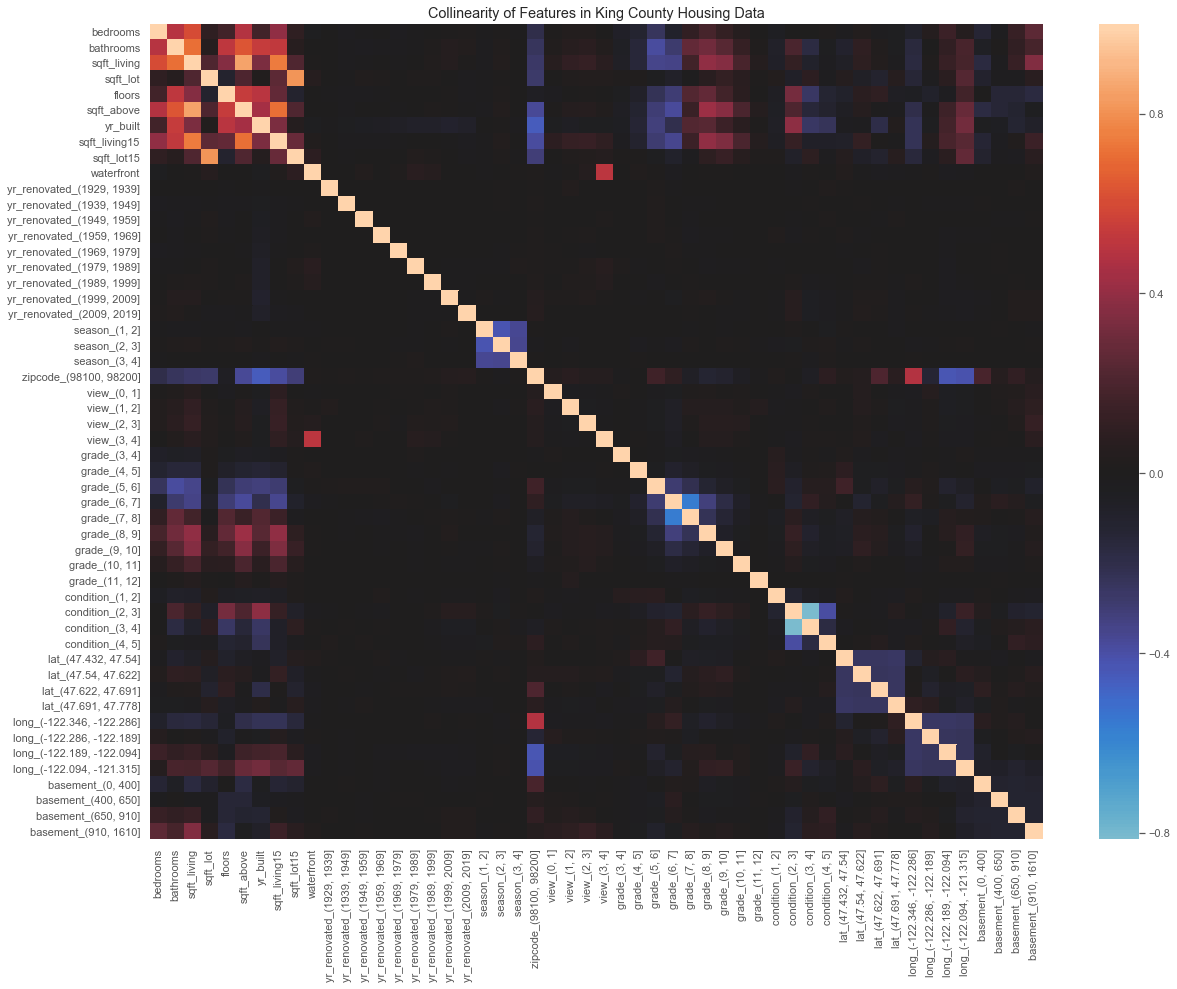

In [95]:
plt.figure(figsize=(20,15))
plt.title('Collinearity of Features in King County Housing Data')
sns.heatmap(house_df_pred.corr(), center=0);

According to the correlation matrix, `'sqft_living'` and `'sqft_above'` are highly correlated with one another, as are `'sqft_lot'` and `'sqft_lot15'`. I can remove one feature from each of these pairs, so that they don't negatively affect my regression outcome later on.

From looking at the heat map, I tell that there's a fair amount of collinearity going on in the upper-left corner of my heatmap, which is where all of my continuous data is located.

There are also some examples of negative collinearity. For instance, something interesting is going on in zip codes that begin with 981 (the most urban section of King County), where, it appears, homes tend to be older, and where square footage tends to be low across the board.

In [96]:
house_df_pred.shape

(19762, 52)

Now, I'll manually check out some other potentially collinear pairs that are cut off by my matrix (I have a lot of features at this point!), but which stand out in my heatmap.

In [97]:
abs(house_df_pred[['condition_(2, 3]', 'condition_(3, 4]']].corr())

,"condition_(2, 3]","condition_(3, 4]"
"condition_(2, 3]",1.000000,0.813854
"condition_(3, 4]",0.813854,1.000000


In [98]:
abs(house_df_pred[['grade_(6, 7]', 'grade_(7, 8]']].corr())

,"grade_(6, 7]","grade_(7, 8]"
"grade_(6, 7]",1.00000,0.56037
"grade_(7, 8]",0.56037,1.00000


In [99]:
abs(house_df_pred[['long_(-122.346, -122.286]', 'zipcode_(98100, 98200]']].corr())

,"long_(-122.346, -122.286]","zipcode_(98100, 98200]"
"long_(-122.346, -122.286]",1.000000,0.484744
"zipcode_(98100, 98200]",0.484744,1.000000


In [100]:
abs(house_df_pred[['view_(3, 4]', 'waterfront']].corr())

,"view_(3, 4]",waterfront
"view_(3, 4]",1.000000,0.506165
waterfront,0.506165,1.000000


Looks like I can add `'condition_(2, 3]'` and `'condition_(3, 4]'` to that list of highly collinear pairings. Now I'll drop one column from each of these three pairs, choosing the one from each pair that correlates less with `'price'`, the target variable.

I'll commit to dropping the offending columns from my original DataFrame, and move forward with that into the next phase of the process: model-building.

In [101]:
house_df = house_df.drop(['sqft_above', 'sqft_lot15', 'condition_(2, 3]'], axis=1)

In [102]:
house_df.shape

(19762, 50)

## 4. Model
Construct models to predict and forecast.

Before fitting a model, I'll make scattermatrix to get a quick idea of **whether my continuous data satisfies the least squares regression assumptions of *linearity*, *normality*, and *homoscedasticity*.**

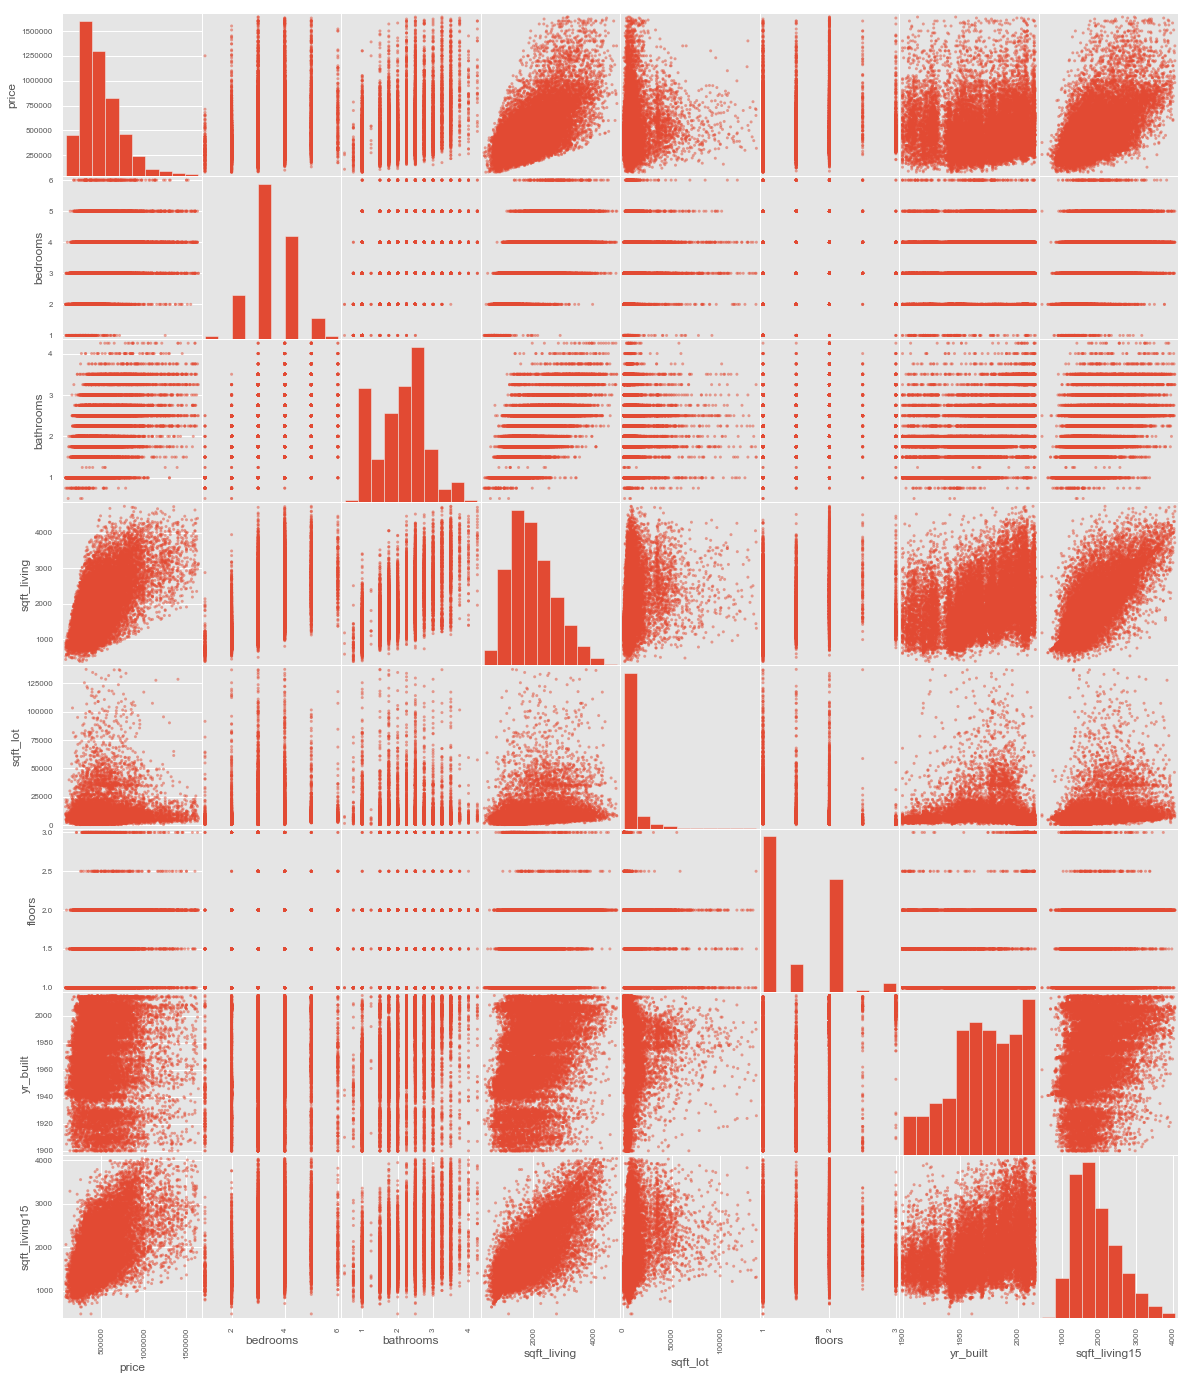

In [103]:
feat = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
        'sqft_lot', 'floors', 'yr_built', 'sqft_living15']

pd.plotting.scatter_matrix(house_df[feat], figsize=(20,24));

The only one of my continuous variables that looks like it's close to being normally distributed is my `'bedrooms'` feature; while the only features that appear to have any linearity are `'bathrooms'`, `'sqft_living'`, and `'sqft_living15'`.

I'm soon going to want to scale and normalize my features. First, though, I'm curious to see what results I would get when building a model with my features as they are.

In [104]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [105]:
predictors = house_df.drop('price', axis=1)
predictors_int = sm.add_constant(predictors)
model = sm.OLS(house_df['price'],predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     1342.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:56:40   Log-Likelihood:            -2.5879e+05
No. Observations:               19762   AIC:                         5.177e+05
Df Residuals:                   19712   BIC:                         5.181e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       1.67e+06   1.51e+05     11.050      0.000    1.37e+06    1.97e+06
bedrooms                  -6666.5194   1312.904     -5.078      0.000   -9239.922   -4093.117
bathrooms                  2.124e+04   2152.579      9.869      0.000     1.7e+04    2.55e+04
sqft_living                 111.2299      2.659     41.838      0.000     106.019     116.441
sqft_lot                      0.3062      0.079      3.872      0.000       0.151       0.461
floors                    -3614.9700   2383.610     -1.517      0.129   -8287.046    1057.106
yr_built                   -811.5848     49.155    -16.511      0.000    -907.933    -715.237
sqft_living15                38.9601      2.388     16.316      0.000      34.280      43.641
waterfront                 2.044e+05   1.67e+04     12.211      0.000    1.72e+05    2.37e+05
yr_renovated_(1929, 1939] -4154.5727   1.18e+05     -0.035      0.972   -2.36e+05    2.27e+05
yr_renovated_(1939, 1949]  -4.14e+04   4.82e+04     -0.858      0.391   -1.36e+05    5.31e+04
yr_renovated_(1949, 1959]   3.85e+04   3.05e+04      1.260      0.208   -2.14e+04    9.84e+04
yr_renovated_(1959, 1969] -2.257e+04   2.28e+04     -0.991      0.322   -6.72e+04    2.21e+04
yr_renovated_(1969, 1979] -2.135e+04   1.88e+04     -1.138      0.255   -5.81e+04    1.54e+04
yr_renovated_(1979, 1989]  1.199e+04   1.16e+04      1.031      0.302   -1.08e+04    3.48e+04
yr_renovated_(1989, 1999]  5.937e+04   1.12e+04      5.315      0.000    3.75e+04    8.13e+04
yr_renovated_(1999, 2009]  9.307e+04   8903.297     10.454      0.000    7.56e+04    1.11e+05
yr_renovated_(2009, 2019]  8.566e+04   1.03e+04      8.330      0.000    6.55e+04    1.06e+05
season_(1, 2]              1.942e+04   2543.609      7.636      0.000    1.44e+04    2.44e+04
season_(2, 3]             -2805.1855   2560.172     -1.096      0.273   -7823.339    2212.968
season_(3, 4]             -5167.0378   2672.401     -1.933      0.053   -1.04e+04      71.093
zipcode_(98100, 98200]    -4802.6827   3513.406     -1.367      0.172   -1.17e+04    2083.890
view_(0, 1]                8.229e+04   7160.193     11.493      0.000    6.83e+04    9.63e+04
view_(1, 2]                6.346e+04   4473.136     14.187      0.000    5.47e+04    7.22e+04
view_(2, 3]                1.206e+05   6461.928     18.669      0.000    1.08e+05    1.33e+05
view_(3, 4]                 2.15e+05   1.07e+04     20.110      0.000    1.94e+05    2.36e+05
grade_(3, 4]               -1.43e+05    1.2e+05     -1.190      0.234   -3.79e+05    9.25e+04
grade_(4, 5]              -1.492e+05   1.18e+05     -1.261      0.207   -3.81e+05    8.27e+04
grade_(5, 6]              -1.364e+05   1.18e+05     -1.155      0.248   -3.68e+05     9.5e+04
grade_(6, 7]              -1.009e+05   1.18e+05     -0.855      0.393   -3.

The R^2 value of 0.769 tells me that the model explains 76.9% of the variability of the response data around its mean.

The coefficients tell me that for every 1-unit increase in a given x-variable, I can expect to see that much of an increase or decrease in `'price'`. For example, the coefficient for `'sqft_living'` is 111.3166; so, for every square foot added to a home, the model predicts a price increase of $111.3166.

Some of my P-values exceed the significance threshold of 0.05, meaning that the null hypothesis cannot be rejected, and that these are therefore not statistically significant variables; they undermine the performance of the model. For example, the P-value of `'yr_renovated_(1940, 1950]'` is 0.687, which tells me that there is a 68.7% chance that the coefficient is actually 0.0. 

Now, in order to improve the regression algorithm's predictive performance, I'm going to run log transformations on some of these initial features, to give them certain properties such as normality.

In [106]:
# Checking on the pre-transformation collinearity of my features.

abs(house_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
              'floors', 'yr_built', 'sqft_living15', 'price']].corr())

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,sqft_living15,price
bedrooms,1.000000,0.495124,0.604329,0.094329,0.167154,0.169941,0.392808,0.296032
bathrooms,0.495124,1.000000,0.714398,0.053798,0.513965,0.540416,0.528615,0.453171
sqft_living,0.604329,0.714398,1.000000,0.216262,0.356914,0.340460,0.739007,0.627242
sqft_lot,0.094329,0.053798,0.216262,1.000000,0.099790,0.027412,0.255678,0.089921
floors,0.167154,0.513965,0.356914,0.099790,1.000000,0.500642,0.270202,0.269658
yr_built,0.169941,0.540416,0.340460,0.027412,0.500642,1.000000,0.336437,0.028698
sqft_living15,0.392808,0.528615,0.739007,0.255678,0.270202,0.336437,1.000000,0.556379
price,0.296032,0.453171,0.627242,0.089921,0.269658,0.028698,0.556379,1.000000


In [107]:
# Running logarithmic transformations on all independent features.

non_normal = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
              'floors', 'yr_built', 'sqft_living15']

for feat in non_normal:
    house_df[feat] = house_df[feat].map(lambda x: np.log(x))

In [108]:
# Checking on the post-transformation collinearity of my features.

abs(house_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
              'floors', 'yr_built', 'sqft_living15', 'price']].corr())

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,sqft_living15,price
bedrooms,1.000000,0.510676,0.645296,0.215094,0.199321,0.199425,0.410912,0.286112
bathrooms,0.510676,1.000000,0.736002,0.013610,0.507757,0.547173,0.540518,0.426393
sqft_living,0.645296,0.736002,1.000000,0.281669,0.383873,0.352384,0.722945,0.590961
sqft_lot,0.215094,0.013610,0.281669,1.000000,0.297114,0.060922,0.341808,0.076310
floors,0.199321,0.507757,0.383873,0.297114,1.000000,0.481019,0.287760,0.282949
yr_built,0.199425,0.547173,0.352384,0.060922,0.481019,1.000000,0.334880,0.027273
sqft_living15,0.410912,0.540518,0.722945,0.341808,0.287760,0.334880,1.000000,0.537064
price,0.286112,0.426393,0.590961,0.076310,0.282949,0.027273,0.537064,1.000000


It appears that the collinearity between my predictors and `'price'` actually *decreased* in most instances. **I don't know why that is, so that's a question that I'll need to investigate further in the future.**

For now, I'll get a visual of how my data is more normalized after those log transformations.

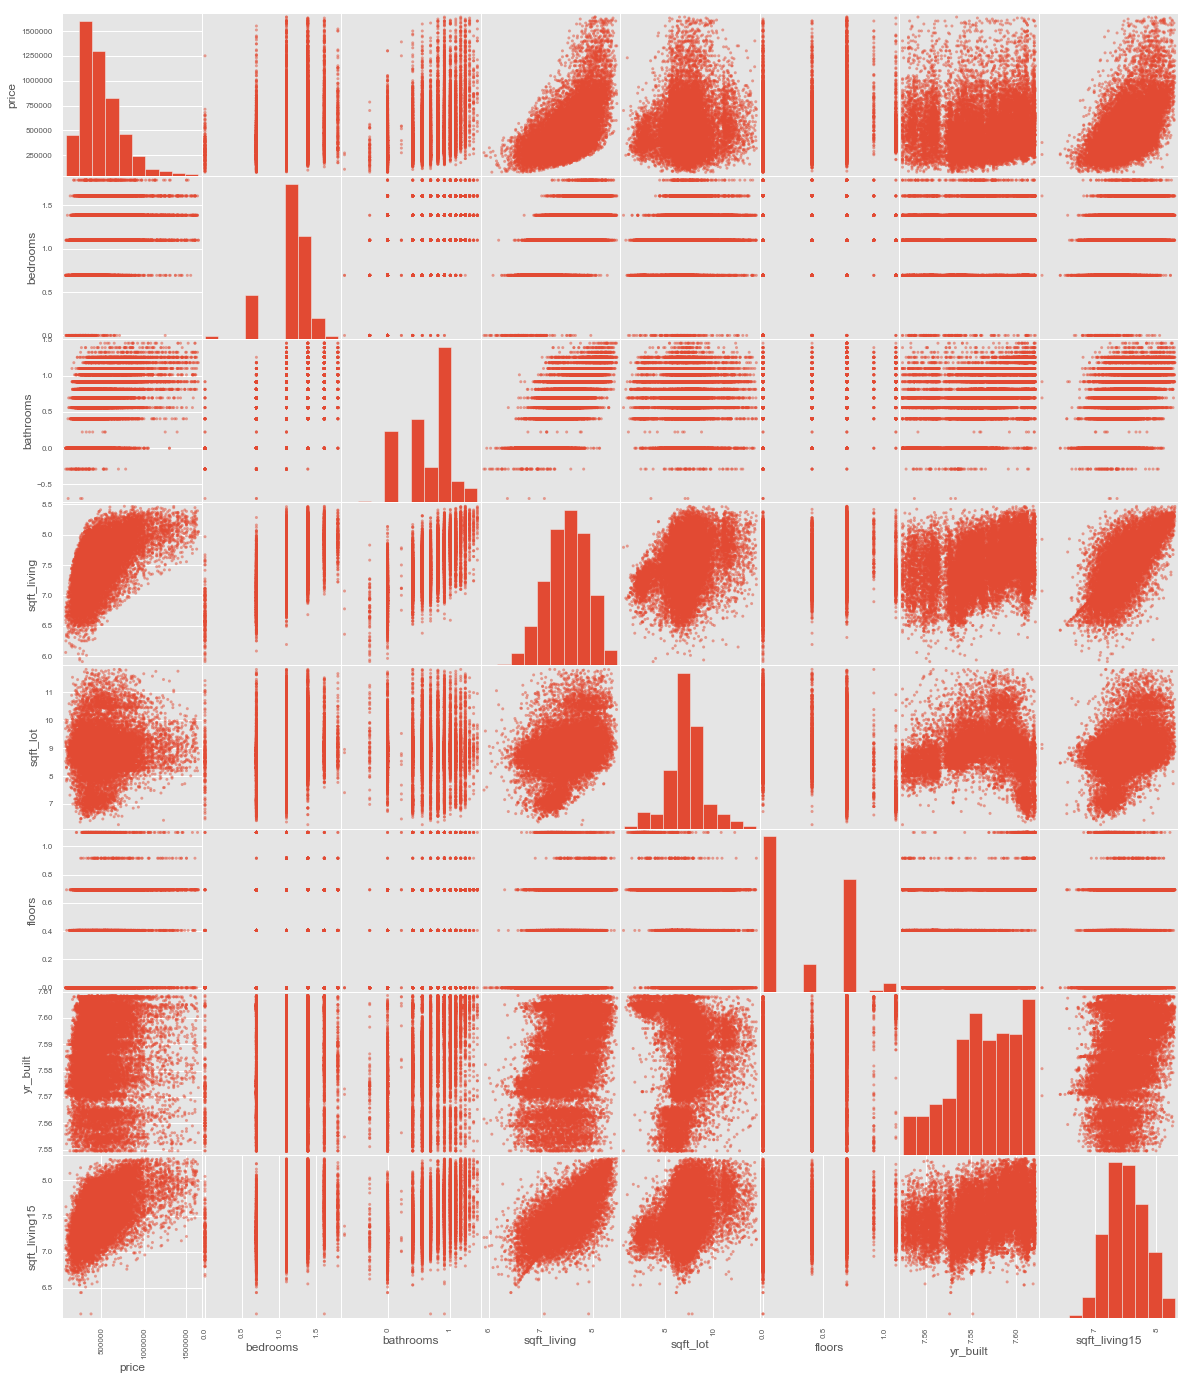

In [109]:
feat = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
        'sqft_lot', 'floors', 'yr_built', 'sqft_living15']

pd.plotting.scatter_matrix(house_df[feat], figsize=(20,24));

When looking at the histograms that run diagonally from left to right, I can clearly see that while my data is not perfectly normal, it's certainly more normal than it was initially. Now, let me see what differences that made in my model.

In [110]:
predictors = house_df.drop('price', axis=1)
predictors_int = sm.add_constant(predictors)
model = sm.OLS(house_df['price'],predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1288.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:57:15   Log-Likelihood:            -2.5910e+05
No. Observations:               19762   AIC:                         5.183e+05
Df Residuals:                   19712   BIC:                         5.187e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      8.822e+06   7.63e+05     11.557      0.000    7.33e+06    1.03e+07
bedrooms                   -2.11e+04   4246.160     -4.968      0.000   -2.94e+04   -1.28e+04
bathrooms                  2.361e+04   4085.114      5.779      0.000    1.56e+04    3.16e+04
sqft_living                1.912e+05   5392.124     35.458      0.000    1.81e+05    2.02e+05
sqft_lot                   8627.7761   1628.250      5.299      0.000    5436.269    1.18e+04
floors                     6438.8109   3967.927      1.623      0.105   -1338.661    1.42e+04
yr_built                  -1.378e+06   9.85e+04    -13.985      0.000   -1.57e+06   -1.18e+06
sqft_living15              7.713e+04   4638.517     16.629      0.000     6.8e+04    8.62e+04
waterfront                 1.975e+05    1.7e+04     11.604      0.000    1.64e+05    2.31e+05
yr_renovated_(1929, 1939] -3.223e+04    1.2e+05     -0.269      0.788   -2.67e+05    2.03e+05
yr_renovated_(1939, 1949] -3.701e+04    4.9e+04     -0.755      0.450   -1.33e+05    5.91e+04
yr_renovated_(1949, 1959]  4.569e+04    3.1e+04      1.473      0.141   -1.51e+04    1.07e+05
yr_renovated_(1959, 1969] -2.056e+04   2.31e+04     -0.888      0.374   -6.59e+04    2.48e+04
yr_renovated_(1969, 1979] -2.269e+04   1.91e+04     -1.190      0.234   -6.01e+04    1.47e+04
yr_renovated_(1979, 1989]    1.4e+04   1.18e+04      1.186      0.236   -9148.895    3.72e+04
yr_renovated_(1989, 1999]  6.526e+04   1.13e+04      5.750      0.000     4.3e+04    8.75e+04
yr_renovated_(1999, 2009]   9.76e+04   9040.301     10.796      0.000    7.99e+04    1.15e+05
yr_renovated_(2009, 2019]  9.161e+04   1.04e+04      8.771      0.000    7.11e+04    1.12e+05
season_(1, 2]              1.944e+04   2584.062      7.521      0.000    1.44e+04    2.45e+04
season_(2, 3]             -2773.1223   2601.001     -1.066      0.286   -7871.304    2325.060
season_(3, 4]             -4503.2319   2714.763     -1.659      0.097   -9824.396     817.932
zipcode_(98100, 98200]    -1771.2036   3598.160     -0.492      0.623   -8823.901    5281.494
view_(0, 1]                8.387e+04   7271.950     11.533      0.000    6.96e+04    9.81e+04
view_(1, 2]                6.608e+04   4544.022     14.542      0.000    5.72e+04     7.5e+04
view_(2, 3]                1.239e+05   6559.894     18.894      0.000    1.11e+05    1.37e+05
view_(3, 4]                2.143e+05   1.09e+04     19.739      0.000    1.93e+05    2.36e+05
grade_(3, 4]               -1.64e+05   1.22e+05     -1.343      0.179   -4.03e+05    7.53e+04
grade_(4, 5]              -1.989e+05    1.2e+05     -1.655      0.098   -4.34e+05    3.66e+04
grade_(5, 6]              -2.037e+05    1.2e+05     -1.698      0.090   -4.39e+05    3.14e+04
grade_(6, 7]              -1.843e+05    1.2e+05     -1.535      0.125   -4.

As expected (after seeing drops in multicollinearity) the R^2 value decreased slightly. Even if log transformations do not improve the accuracy of the model, though, the expectation at least is that the residuals will be become more normal. Still let me see if log transforming my target variable (`'price'`), which itself is not distributed normally, leads to higher accuracy.

In [111]:
house_df['price'] = np.log(house_df['price'])

In [112]:
abs(house_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
              'floors', 'yr_built', 'sqft_living15', 'price']].corr())

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,sqft_living15,price
bedrooms,1.000000,0.510676,0.645296,0.215094,0.199321,0.199425,0.410912,0.303275
bathrooms,0.510676,1.000000,0.736002,0.013610,0.507757,0.547173,0.540518,0.461206
sqft_living,0.645296,0.736002,1.000000,0.281669,0.383873,0.352384,0.722945,0.613850
sqft_lot,0.215094,0.013610,0.281669,1.000000,0.297114,0.060922,0.341808,0.051595
floors,0.199321,0.507757,0.383873,0.297114,1.000000,0.481019,0.287760,0.305433
yr_built,0.199425,0.547173,0.352384,0.060922,0.481019,1.000000,0.334880,0.053683
sqft_living15,0.410912,0.540518,0.722945,0.341808,0.287760,0.334880,1.000000,0.554439
price,0.303275,0.461206,0.613850,0.051595,0.305433,0.053683,0.554439,1.000000


Collinearity between my predictors and `'price'` went up across the board! Let me now see if my model accuracy improved accordingly.

In [113]:
predictors = house_df.drop('price', axis=1)
predictors_int = sm.add_constant(predictors)
model = sm.OLS(house_df['price'],predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     1679.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:57:15   Log-Likelihood:                 3005.7
No. Observations:               19762   AIC:                            -5911.
Df Residuals:                   19712   BIC:                            -5517.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        27.3697      1.326     20.637      0.000      24.770      29.969
bedrooms                     -0.0546      0.007     -7.405      0.000      -0.069      -0.040
bathrooms                     0.0573      0.007      8.072      0.000       0.043       0.071
sqft_living                   0.4080      0.009     43.552      0.000       0.390       0.426
sqft_lot                      0.0144      0.003      5.106      0.000       0.009       0.020
floors                        0.0160      0.007      2.323      0.020       0.003       0.030
yr_built                     -2.5197      0.171    -14.720      0.000      -2.855      -2.184
sqft_living15                 0.1955      0.008     24.261      0.000       0.180       0.211
waterfront                    0.3844      0.030     13.001      0.000       0.326       0.442
yr_renovated_(1929, 1939]     0.1016      0.208      0.487      0.626      -0.307       0.510
yr_renovated_(1939, 1949]    -0.0181      0.085     -0.213      0.832      -0.185       0.149
yr_renovated_(1949, 1959]     0.0286      0.054      0.530      0.596      -0.077       0.134
yr_renovated_(1959, 1969]    -0.0532      0.040     -1.323      0.186      -0.132       0.026
yr_renovated_(1969, 1979]    -0.0121      0.033     -0.365      0.715      -0.077       0.053
yr_renovated_(1979, 1989]     0.0170      0.021      0.830      0.407      -0.023       0.057
yr_renovated_(1989, 1999]     0.0982      0.020      4.981      0.000       0.060       0.137
yr_renovated_(1999, 2009]     0.1294      0.016      8.236      0.000       0.099       0.160
yr_renovated_(2009, 2019]     0.1472      0.018      8.110      0.000       0.112       0.183
season_(1, 2]                 0.0425      0.004      9.465      0.000       0.034       0.051
season_(2, 3]                -0.0036      0.005     -0.794      0.427      -0.012       0.005
season_(3, 4]                -0.0075      0.005     -1.600      0.110      -0.017       0.002
zipcode_(98100, 98200]        0.0121      0.006      1.938      0.053      -0.000       0.024
view_(0, 1]                   0.1411      0.013     11.168      0.000       0.116       0.166
view_(1, 2]                   0.1086      0.008     13.754      0.000       0.093       0.124
view_(2, 3]                   0.1681      0.011     14.752      0.000       0.146       0.190
view_(3, 4]                   0.2683      0.019     14.225      0.000       0.231       0.305
grade_(3, 4]                 -0.5639      0.212     -2.658      0.008      -0.980      -0.148
grade_(4, 5]                 -0.5512      0.209     -2.640      0.008      -0.960      -0.142
grade_(5, 6]                 -0.4633      0.208     -2.223      0.026      -0.872      -0.055
grade_(6, 7]                 -0.3561      0.208     -1.708      0.088      

Indeed, it did.

And now, since both my dependant and independent variables have been log transformed, I interpret my new coefficients a bit differently: *A 1% increase in the independent variable leads to an increase/decrease in the dependant variable (`'price'`) by [coef]%.*

Next, I could choose to scale my data, so that everything is on equal footing, and so that I can later rank my features using Recursive Feature Elimination (which requires scaling). Instead, I'll skip that, and use stepwise selection to pick out which features ought to be included in my model. Because I still see some disconcertingly high P-values.

In [114]:
# from sklearn.preprocessing import MinMaxScaler

In [115]:
# scaler = MinMaxScaler()

In [116]:
# scaler.fit(house_df['bedrooms'].values.reshape(-1, 1))
# scaler.fit(house_df['bathrooms'].values.reshape(-1, 1))
# scaler.fit(house_df['sqft_living'].values.reshape(-1, 1))
# scaler.fit(house_df['sqft_lot'].values.reshape(-1, 1))
# scaler.fit(house_df['floors'].values.reshape(-1, 1))
# scaler.fit(house_df['yr_built'].values.reshape(-1, 1))
# scaler.fit(house_df['sqft_living15'].values.reshape(-1, 1))
# scaler.fit(house_df['price'].values.reshape(-1, 1))

In [117]:
# house_df['bedrooms'] = scaler.transform(house_df['bedrooms'].values.reshape(-1, 1))
# house_df['bathrooms'] = scaler.transform(house_df['bathrooms'].values.reshape(-1, 1))
# house_df['sqft_living'] = scaler.transform(house_df['sqft_living'].values.reshape(-1, 1))
# house_df['sqft_lot'] = scaler.transform(house_df['sqft_lot'].values.reshape(-1, 1))
# house_df['floors'] = scaler.transform(house_df['floors'].values.reshape(-1, 1))
# house_df['yr_built'] = scaler.transform(house_df['yr_built'].values.reshape(-1, 1))
# house_df['sqft_living15'] = scaler.transform(house_df['sqft_living15'].values.reshape(-1, 1))
# house_df['price'] = scaler.transform(house_df['price'].values.reshape(-1, 1))

Now that my variables are <s>scaled and</s> transformed, it's time to figure out which ones are best suited to be used in my model, i.e., which ones have the most predictive value. I'll do this using stepwise selection, which will return the names of the most statistically significant features.

In [118]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [119]:
predictors = house_df.drop('price', axis=1)

In [120]:
result = stepwise_selection(predictors, house_df["price"], verbose = True)
print('resulting features:')
print(result)

Add  grade_(5, 6]                   with p-value 0.0
Add  lat_(47.54, 47.622]            with p-value 0.0
Add  bathrooms                      with p-value 0.0
Add  grade_(6, 7]                   with p-value 0.0
Add  sqft_living15                  with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  lat_(47.622, 47.691]           with p-value 0.0
Add  lat_(47.691, 47.778]           with p-value 0.0
Add  lat_(47.432, 47.54]            with p-value 0.0
Add  view_(3, 4]                    with p-value 1.44042e-123
Add  grade_(7, 8]                   with p-value 3.84404e-117
Add  grade_(4, 5]                   with p-value 1.82723e-175
Add  view_(2, 3]                    with p-value 5.04545e-51
Add  view_(1, 2]                    with p-value 1.22081e-47
Add  condition_(4, 5]               with p-value 2.50801e-47
Add  season_(1, 2]                  with p-value 3.46084e-41
Add  waterfront                     with

Now I'll build the model again, this time including only the dependant variable (`'price'`) and the independent variables produced by the stepwise selection process (i.e., only those features with P-values lower than 0.05).

In [121]:
house_df_mod = house_df[['price', 'grade_(6, 7]', 'sqft_living', 'lat_(47.54, 47.622]', 'lat_(47.622, 47.691]',
                          'lat_(47.691, 47.778]', 'lat_(47.432, 47.54]', 'sqft_living15', 'view_(3, 4]',
                          'grade_(5, 6]', 'yr_built', 'grade_(7, 8]', 'grade_(4, 5]', 'view_(2, 3]',
                          'condition_(4, 5]', 'view_(1, 2]', 'season_(1, 2]', 'waterfront', 'condition_(3, 4]',
                          'grade_(3, 4]', 'grade_(8, 9]', 'view_(0, 1]', 'yr_renovated_(1999, 2009]',
                          'condition_(1, 2]', 'yr_renovated_(2009, 2019]', 'grade_(9, 10]', 'bedrooms',
                          'bathrooms', 'long_(-122.189, -122.094]', 'long_(-122.346, -122.286]', 'basement_(910, 1610]',
                          'long_(-122.094, -121.315]', 'basement_(650, 910]', 'long_(-122.286, -122.189]',
                          'yr_renovated_(1989, 1999]', 'sqft_lot', 'basement_(400, 650]']]

In [122]:
predictors = house_df_mod.drop(['price'], axis=1)
predictors_int = sm.add_constant(predictors)
model = sm.OLS(house_df_mod['price'],predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     2284.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:58:01   Log-Likelihood:                 2995.9
No. Observations:               19762   AIC:                            -5918.
Df Residuals:                   19725   BIC:                            -5626.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        27.5845      1.263     21.841      0.000      25.109      30.060
grade_(6, 7]                 -0.4600      0.018    -24.884      0.000      -0.496      -0.424
sqft_living                   0.4150      0.009     46.477      0.000       0.397       0.432
lat_(47.54, 47.622]           0.5668      0.005    109.261      0.000       0.557       0.577
lat_(47.622, 47.691]          0.7090      0.005    130.432      0.000       0.698       0.720
lat_(47.691, 47.778]          0.4543      0.005     95.132      0.000       0.445       0.464
lat_(47.432, 47.54]           0.2370      0.005     49.319      0.000       0.228       0.246
sqft_living15                 0.1932      0.008     24.097      0.000       0.177       0.209
view_(3, 4]                   0.2719      0.019     14.456      0.000       0.235       0.309
grade_(5, 6]                 -0.5663      0.020    -28.652      0.000      -0.605      -0.528
yr_built                     -2.5336      0.165    -15.391      0.000      -2.856      -2.211
grade_(7, 8]                 -0.3496      0.018    -19.446      0.000      -0.385      -0.314
grade_(4, 5]                 -0.6540      0.024    -27.035      0.000      -0.701      -0.607
view_(2, 3]                   0.1695      0.011     14.899      0.000       0.147       0.192
condition_(4, 5]              0.1293      0.006     21.372      0.000       0.117       0.141
view_(1, 2]                   0.1101      0.008     13.991      0.000       0.095       0.126
season_(1, 2]                 0.0464      0.003     14.369      0.000       0.040       0.053
waterfront                    0.3860      0.030     13.079      0.000       0.328       0.444
condition_(3, 4]              0.0610      0.004     16.159      0.000       0.054       0.068
grade_(3, 4]                 -0.6647      0.045    -14.732      0.000      -0.753      -0.576
grade_(8, 9]                 -0.2128      0.018    -11.865      0.000      -0.248      -0.178
view_(0, 1]                   0.1419      0.013     11.240      0.000       0.117       0.167
yr_renovated_(1999, 2009]     0.1292      0.016      8.239      0.000       0.098       0.160
condition_(1, 2]             -0.1338      0.017     -7.775      0.000      -0.168      -0.100
yr_renovated_(2009, 2019]     0.1463      0.018      8.066      0.000       0.111       0.182
grade_(9, 10]                -0.1366      0.019     -7.273      0.000      -0.173      -0.100
bedrooms                     -0.0554      0.007     -7.521      0.000      -0.070      -0.041
bathrooms                     0.0608      0.007      8.742      0.000       0.047       0.074
long_(-122.189, -122.094]    -0.0734      0.005    -13.614      0.000      -0.084      -0.063
long_(-122.346, -122.286]    -0.0494      0.005    -10.539      0.000      

The model explains 80.7% of the variability of the response data around its mean. And all P-values are zero, meaning I can reject the null hypothesis across the board.

Lastly, I'll perform K-Fold Cross Validation, which splits the entire dataset into {K} equal sections of data, and then trains {K} linear regression models on the data. Each linear model uses a different section of data as the test set, and all other sections combined as the training set. This is an effective approach to model-training/testing because it dramatically reduces the unpredictable influence ("noise") of randomness on my result.

The MSE values of each individual model will then be averaged together, producing an MSE value that is closer to the model's actual MSE

In [123]:
y = house_df_mod[['price']]
x = house_df_mod.drop(['price'], axis=1)

In [124]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [125]:
cv_5_results  = np.mean(cross_val_score(linreg, x, y, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, x, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, x, y, cv=20, scoring='neg_mean_squared_error'))

In [126]:
cv_5_results

-0.04382501533986247

In [127]:
cv_10_results

-0.04374756651783268

In [128]:
cv_20_results

-0.043568292081510376

## 5. Interpret
Apply results to real-world questions. Draw conclusions, and communicate them.

Now, to see how I will apply these results to my business case, look for the `'presentation.pdf'` file in the present repository.